Followed saiful(2) code  (updated....)
This is final code within inference (wer 34.25%% for medium, 12/1 batch size within 48 gb gpu, 50 gb disk space. The checkpoint are updated in hf. )
The checkpoint of 35% for medium within medium model is saved on udoy's drive.

colab within inference

In [1]:
!pip install -q gdown py7zr datasets evaluate transformers[sentencepiece] librosa jiwer

# Upgrade accelerate
!pip install -q accelerate -U

# Install latest numpy and compatible scipy version
!pip install numpy==2.0.2 scipy==1.15.2 pandas==2.2.2 --no-cache-dir --force-reinstall

# Reinstall packages that depend on numpy
!pip install bangla-python openpyxl audiomentations --no-cache-dir --force-reinstall

# Fix "collection" issue
!pip install collections-extended



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 285.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 302.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 304.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 293.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.9/507.9 kB 334.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 336.2 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.1
    Uninstalling pytz-2025.1:
      Successfully uninstalled pytz-2025.1
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.1
    Uninstalling tzdata-2025.1:
      Successfully uninstalled tzdata-2025.1
  Attempting uninstall: six
    Found existing in

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 111.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 214.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of numpy-minmax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of numpy-rms to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 317.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 290.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 299.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 329.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 263.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 306.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.5/252.5 k

In [ ]:
# !pip -q install gdown
# !pip -q install py7zr
# !pip -q install datasets evaluate transformers[sentencepiece] librosa jiwer
# !pip install accelerate -Uq
# !pip install bangla-python
# !pip install collection
# !pip install openpyxl
# !pip install audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 21.2 MB/s eta 0:00:00
  Using cached audiomentations-0.39.0-py3-none-any.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached numpy_minmax-0.4.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached numpy_rms-0.5.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.5 kB)
  Using cached scipy-1.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
INFO: pip is looking at multiple versions of numpy-minmax to determine which version is compatible with other requirements. This could take a while.
  Using cached numpy_minmax-0.3.1-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinu

In [2]:
!gdown 1EkNql3Vf_AJsjlJe8iX2ZZiUZSx-qWYh   #text. unzip
!gdown 1X_hnB3CDorqYrRc4gbOKg2be_dLPHiOg   #voice. zip

Downloading...
From: https://drive.google.com/uc?id=1EkNql3Vf_AJsjlJe8iX2ZZiUZSx-qWYh
To: /content/ASR text.xlsx
100% 164k/164k [00:00<00:00, 45.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1X_hnB3CDorqYrRc4gbOKg2be_dLPHiOg
From (redirected): https://drive.google.com/uc?id=1X_hnB3CDorqYrRc4gbOKg2be_dLPHiOg&confirm=t&uuid=56cb09a2-3e2a-487e-99b9-4b6fc53907d1
To: /content/Speech.7z
100% 2.22G/2.22G [00:22<00:00, 99.1MB/s]


In [ ]:
!py7zr x 'Speech.7z'

In [ ]:
# !rm 'ASR text.7z'
!rm 'Speech.7z'

In [ ]:
import os
import librosa
import random
import torch
import evaluate
import torchaudio
import numpy as np
import pandas as pd
import bn
import copy

# normal DS stuff
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
# stdlib stuff
from glob import glob
import random
from pathlib import Path
# display stuff
from IPython.display import Audio
import soundfile as sf

from collections import Counter
from datasets import Dataset
from dataclasses import dataclass
from typing import Any, Dict, List, Union
from transformers import Seq2SeqTrainingArguments
from transformers import Seq2SeqTrainer
from transformers import WhisperTokenizer
from transformers import WhisperProcessor
from transformers import WhisperFeatureExtractor
from transformers import WhisperForConditionalGeneration

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

##Code for upload my dataset in huggung face

In [ ]:
df = pd.read_excel('ASR text.xlsx')
df.head()

,id,Text
0,Recordign (1).wav,আমার মায়ের জন্য medicine বাবদ প্রতি মাসে almos...
1,Recordign (2).wav,"স্যারের কথার summary হল- মানুষ যখন চলে যায়, তা..."
2,Recordign (3).wav,lab এ সকল ল্যাব member দের মধ্যে দায়িত্ব সবসময়...
3,Recordign (4).wav,ছবিতে দেখা যাচ্ছে আমরা দুইজন ল্যাবের কাজে busy...
4,Recordign (5).wav,ল্যাবের দুইজনকে always আল্লাহর কাছে দুয়া প্রার...


In [ ]:
df['id'] = df['id'].replace('Recordign', 'Recording', regex=True)

In [ ]:
mp3_path = "Speech"

#train_csv = "ASRtext_csv"
#val_tsv = "./dataset/dev.tsv"

In [ ]:
from sklearn.model_selection import train_test_split
#df = pd.read_csv(train_csv)
X_train, X_val, y_train, y_val = train_test_split(df[['id']], df['Text'], test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(y_train)

(1280, 1280)

In [ ]:
len(X_val), len(y_val)

(320, 320)

**Train**

In [ ]:
train_xlxs = pd.concat([X_train, y_train], axis=1)
train_xlxs.head()

,id,Text
1532,Recording (1533).wav,NEVER IN DOUBT. Batted all the way with the ta...
628,Recording (629).wav,"তিনি আল-জাজিরাকে বলেন, ‘৯ হাজার ৫০০ কোটি ডলারে..."
693,Recording (694).wav,অবশ্য এখন সংখ্যাটি আরও বেড়েছে। অধিভুক্ত colleg...
705,Recording (706).wav,কেন্দ্রীয় স্বরাষ্ট্র প্রতিমন্ত্রী নিত্যানন্দ র...
497,Recording (498).wav,এ ক্ষেত্রে তাঁরা হামাসের অতীতের বক্তৃতা–বয়ানের...


In [ ]:
#convert train_xlxs to train_csv

train_xlxs.to_csv('train_csv', index=True)

In [ ]:
#Load train_csv format
train_csv = pd.read_csv('train_csv')
train_csv.head()

,Unnamed: 0,id,Text
0,1532,Recording (1533).wav,NEVER IN DOUBT. Batted all the way with the ta...
1,628,Recording (629).wav,"তিনি আল-জাজিরাকে বলেন, ‘৯ হাজার ৫০০ কোটি ডলারে..."
2,693,Recording (694).wav,অবশ্য এখন সংখ্যাটি আরও বেড়েছে। অধিভুক্ত colleg...
3,705,Recording (706).wav,কেন্দ্রীয় স্বরাষ্ট্র প্রতিমন্ত্রী নিত্যানন্দ র...
4,497,Recording (498).wav,এ ক্ষেত্রে তাঁরা হামাসের অতীতের বক্তৃতা–বয়ানের...


In [ ]:
all_tokens=[]
for text in train_csv['Text']:
  tokens = text.split()
  all_tokens.append(tokens)
print(all_tokens)

[['NEVER', 'IN', 'DOUBT.', 'Batted', 'all', 'the', 'way', 'with', 'the', 'tail-enders', 'and', 'took', 'Bangladesh', 'to', 'a', 'very', 'competitive', 'total', 'of', '286', 'runs.'], ['তিনি', 'আল-জাজিরাকে', 'বলেন,', '‘৯', 'হাজার', '৫০০', 'কোটি', 'ডলারের', 'budget,', 'এর', 'মানে', 'হলো', 'যুক্তরাষ্ট্রের', 'কেন্দ্রীয়', 'budget', 'এর', 'পরিমাণ', 'উল্লেখজনক', 'পরিমাণে', 'বেড়েছে।'], ['অবশ্য', 'এখন', 'সংখ্যাটি', 'আরও', 'বেড়েছে।', 'অধিভুক্ত', 'college', 'ও', 'মাদ্রাসার', 'শিক্ষার্থীসহ', 'দেশের', 'সরকারি–বেসরকারি', 'মিলিয়ে', 'বিশ্ববিদ্যালয়গুলোতে', 'total', 'শিক্ষার্থী', '৪৭', 'লাখ', '৫৬', 'হাজার', '৭৪৭', 'জন।'], ['কেন্দ্রীয়', 'স্বরাষ্ট্র', 'প্রতিমন্ত্রী', 'নিত্যানন্দ', 'রাই।', 'বৈঠকে', 'ফসলের', 'minimum', 'সহায়ক', 'মূল্য', 'বা', 'এমএসপির', 'সঙ্গে', 'কেন্দ্রীয়', 'সরকার', 'শস্য', 'বৈচিত্র্যকে', 'জুড়ে', 'দেওয়ার', 'proposal', 'দেন।'], ['এ', 'ক্ষেত্রে', 'তাঁরা', 'হামাসের', 'অতীতের', 'বক্তৃতা–বয়ানের', 'উদ্ধৃতি', 'দিচ্ছেন।', 'America', 'এর', 'প্রতিনিধি', 'পরিষদের', 'আইনপ্রণেতারা', 'স্লোগান

In [ ]:
flat_tokens = [word for sublist in all_tokens for word in sublist]  # Optional
word_counts = Counter(flat_tokens)
word_counts

Counter({'NEVER': 2,
         'IN': 1,
         'DOUBT.': 1,
         'Batted': 1,
         'all': 20,
         'the': 141,
         'way': 6,
         'with': 15,
         'tail-enders': 1,
         'and': 91,
         'took': 1,
         'Bangladesh': 20,
         'to': 74,
         'a': 55,
         'very': 15,
         'competitive': 2,
         'total': 2,
         'of': 56,
         '286': 1,
         'runs.': 1,
         'তিনি': 67,
         'আল-জাজিরাকে': 1,
         'বলেন,': 53,
         '‘৯': 1,
         'হাজার': 32,
         '৫০০': 2,
         'কোটি': 12,
         'ডলারের': 4,
         'budget,': 1,
         'এর': 407,
         'মানে': 5,
         'হলো': 19,
         'যুক্তরাষ্ট্রের': 33,
         'কেন্দ্রীয়': 10,
         'budget': 1,
         'পরিমাণ': 5,
         'উল্লেখজনক': 1,
         'পরিমাণে': 2,
         'বেড়েছে।': 6,
         'অবশ্য': 6,
         'এখন': 48,
         'সংখ্যাটি': 2,
         'আরও': 36,
         'অধিভুক্ত': 1,
         'college': 4,
         'ও': 22

In [ ]:
replace_dict = {'ডলারের': 'dollar এর','মেম্বারের':'member এর',
                'এমএসপির': 'MSP-র','রেগুলার': 'regular','প্রাকটিস':'practise',
                'কমিটি ':'committee-','সফটওয়্যার':'software','রিসোর্টে':'resort এ',
                'নভেম্বর':'november','শার্ট':'shirt','স্পোর্টস':'sports',
                'সুপার':'super','সিরিয়াস':'serious','স্কিল':'skill','লেভেল':'level',
                'ডেভেলপ':'develop','শেয়ার':'share','ভার্সিটি':'versity ','শেয়ার':'share',
                'ইউটিউব':'youtube','স্টাইল':'style',
                'মার্চ':'march','গ্রুপ':'group','স্টক':'stock','হাইকিং':'hiking',
                'মার্কেটের':'market এর','ডেডলাইন':'deadline','এক্টিভিটি':'activity',
                'প্রজেক্ট':'project','ব্যাডমিন্টনে':'badminton এ',
                'ম্যাচ':'match ','মাস্টার্সের':'masters এর','টপ':'top','পার্টনারের':'partner এর',
                'টিম':'team','ভার্জিন':'virgin','রোমান':'roman','গ্যালাক্টিকের':'galactic এর',
                'টেলিস্কোপের':'telescope এর','ক্রেডিট':'credit','পিওর':'pure','গোল্ড':'gold',
                'কার্ডের':'card এর','কার্ড':'card','জুয়েলার্স':'jewellers','ডিস্ট্রাকশনের':'distraction এর',
                'প্লাস':'plus','স্পেসিফিক':'specific','টাইম':'time',
                'ইজি':'easy','ওয়েবসাইটে':'website এ','ক্যারিয়ার':'career','মিডউইকেটে':'midwicket',
                'ওয়েবসাইটের':'website এর','ট্রাম্পকে':'trump কে','আইডিয়া':'idea',
                'ফেব্রুয়ারি':'february','স্টুডেন্ট':'student','পোলিও':'polio','জেনারেশনের':'generation এর',
                'ইউরোপের':'europe এর','কোম্পানিতে':'comapny তে','এচিভ':'achieve','ডিটার্মিনেশন':'determination',
                'প্রেসিডেন্ট':'president','ওভারেই':'over এই', 'ডিস্ট্রাকশন':'distraction',
                'ওভারে':'over এ','টার্গেট':'target','মাষ্ট':'must',
                'লার্নিং':'learning','সোর্স':'source','মেইন':'main',
                'ফলো':'follow','ব্যাংকের':'bank এর','টিউটোরিয়াল':'tutorial',
                'ডলার':'dollar','লিংকডইন':'linkedin','ম্যাচের':'match এর',
                'ম্যাচে':'match এ','ভিডিওতে':'video তে','এক্স':'ex',
                'সল্ভ':'solve','অফিসের':'office এর','লাইকের':'like এর','ফেসবুকে':'facebook এ',
                'পোস্টের':'post এর','অপশনে':'option এ','ক্লিক':'click',
                'অপশন':'option','জার্মানিতে':'germany তে','সেমিস্টারে':'semester এ',
                'বিলিয়ন':'billion','মেটার':'meta-র','সামার':'summer',
                'থ্রেডস':'threads','ওয়েব':'web','স্টুডেন্ট':'student ','কোর':'core',
                'মাস্টার্স':'masters','কোর্স':'course','অ্যাপের':'app এর',
                'নিউজিল্যান্ডের':'newzeland এর','ডিসেম্বর':'december',
                'অ্যাপল':'apple','স্মার্টফোনে':'smartphone এ',
                'অ্যাপের':'app এর','টিচার':'teacher ','অ্যাডমিশন':'admission',
                'মিনিমাম':'minimum','পোর্টফোলিও':'portfolio','বিল্ড':'build','প্রফেশনাল':'professional ',
                'লেভেলে':'level এ','নেটওয়ার্কিং':'networking','রোবট':'robot','রেজাল্ট':'result','রেজিস্ট্রেশন':'registration',
                'লিংকে':'link এ','জয়েন':'join','মার্কেটে':'market এ','অস্ট্রেলিয়া':'australia','আয়ারল্যান্ড':'Ireland',
                '৭সাতচল্লিশ':'সাতচল্লিশ','তিন০০':'তিনশত','levelে':'level এ','সিরিয়াস':'serious','নেটওয়ার্কিং':'networking',
                'শেয়ার':'share','ক্লাস':'class','জয়েন':'join','লাইফে':'life এ','৫-দশ':'পাঁচ থেকে দশ','জুয়েলার্স':'jewellers',
                'আদালত-১-এর':'আদালত-এক-এর','ফ্রেইম':'frame','ওয়েবসাইটে':'website এ','ওয়েবসাইটের':'website এর','ইনিংসের':'innings এর',
                'ব্যাটিংয়েও':'batting এও','exএআইয়ের':'ex AI এর','করপোরেশনের':'corporation এর','মেডিকেল':'medical','কলেজের':'college এর',
                'ফাইল':'file','কোচের':'coach এর','বিলিয়ন':'billion','বিভ্run্তি':'বিভ্রান্তি','১১১টি':'একশত এগার টি',
                '৩৫টি':'পঁয়ত্রিশ টি','core্স':'course','ফেব্রুয়ারি':'february','ব্যাটিংয়ের':'batting এর','কম্পিউটার':'computer','অপারেটর':'operator',
                'অনলাইন':'online','ডিজিটাল':'digital','ভিডিও':'video','জব':'job','ইন্টার্ন':'intern','চ্যালেঞ্জ':'challenge','ফোরামের':'forum এর',
                'ফোন':'phone','ব্যাকএন্ড':'backend','ফোকাস':'focus','প্রবলেম':'problem','মিনিংফুল':'meaningful','রিজনেবল':'reasonable','স্টিকারও':'steaker',
                'চ্যাটবট':'chatbot ','১৫-বিশ':'পনেরো থেকে বিশ',' ইংলিশ':'english','স্পিনার':'speaner','টেকনিকটাই':'technique টাই','এপ্লাই':'apply',
                'প্রোগ্রামিং':'programming','ওয়েব':'web','core্সে':'course এ','ইম্পরট্যান্ট':'important','টাস্ক':'task','রিক্যাপ':'recap','রিভিশন':'revision',
                'রিলাক্স':'relax','মডিউল':'module','মাইনিং':'mining','ডিপার্টমেন্টের':'department এর','ইন্টারনেট':'internet','লাইফের':'life এর','কন্ট্রোল':'control',
                'ওয়ার্ডফেন্সের':'Wordfence এর','ডাটাবেজ':'database','ডাটা':'data','টেস্ট':'test','সাবজেক্টগুলাতে':'subject গুলাতে','সাইবার':'cyber','আর্জেন্টাইন':'argentine',
                'সাইট':'site','অ্যামাজনের':'amazon এর','অ্যামাজন':'amazon','সার্ভিসের':'service এর','৩পাঁচটি':'পাঁচটি','অক্টোবর':'october','চ্যাটজিপিটি':'ChatGpt',
                'ব্রাস্ট':'brust','নাইন–eleven':'nine-eleven','মিড অন':'mid on','ড্রেসিংরুমে':'dreasing room এ','ফ্লোরে':'floor এ','পেপটাইডস':'peptides',
                'বাউন্সের':'bounce এর','স্লিপে':'slip এ','স্ক্রিনশট':'screen shot','পোস্ট':'post','ওয়াশিংটন':'washington','রুপি':'rupe','চেক-ইন':'check-in',
                'ব্যাগেজও':'baggage ও','এআই':'AI','প্যান্টের':'pant এর','হার্ডওয়ার্ক':'hardwork','ইনস্ট্যান্ট':'instant','লংটার্ম':'long-term',
                'ফিউচার':'future','সাবজেক্টে':'subject এ','এডমিশন':'admission','ডাক মোড':'dark mood','টুইটারে':'twitter এ',
                'levelের':'level এর','সিগ্নিফিক্যান্ট':'significant','গ্রোথ':'growth','জাম্প':'jump','স্টার্ট':'start','লাইনআপ':'line up',
                'বোলিংয়ে':'bowling এ','উইকেটও':'wicket ও','বুয়েট':'Buet','কংগ্রেস':'congress','ফুjobল':'ফুটবল','লং টেনিস':'long tennis',

                'টেবিল টেনিসে':'tabble tennis এ','ক্যাপ্টেন':'captain','নিউজ':'news','কোম্পানির':'company এর','এনরোল':'enroll','সিএসইর':'cse এর','১৯৬০':'উনিশ শত ষাট',
                'লেগ সাইডে':'leg side এ','ডটকম':'dot com','ডোmain':'domain','ফুল ফান্ড':'full fund','ইউনিversity':'university','জাস্ট':'just','কোম্পানি':'company',
                'স্ট্যান্ট':'stunt','threadsের':'threads এর','phoneে':'phone এ','অফার':'offer','গ্যারান্টি':'guarantee','অনার্স':'honours','২০২২':'দুই হাজার বাইশ','চেয়ারম্যান':'chairman',

                'টুল':'tool','ফ্রিজ':'fridge','newsিল্যান্ডে':'new zealand এ','বাস্কেটে':'busket এ','হিরোতে':'hero তে','পিকনিক':'picnic','পিকনিকের':'picnic এর','বাসেই':'bus এই','মেম্বার':'member',
                '৯০%':'নব্বই পারসেন্ট','১০%':'দশ পারসেন্ট','ভেন্যু':'venue ','১১০.৮০':'একশ দশ দশমিক আশি','সিরিয়াস':'serious','সিমিলার':'simmilar','মাইন্ডেড':'minded','ফ্রেন্ড':'friend ',
                'স্ট্যান্ট':'stunt','threadsের':'threads এর','phoneে':'phone এ','অফার':'offer','গ্যারান্টি':'guarantee','অনার্স':'honours','২০২২':'দুই হাজার বাইশ','চেয়ারম্যান':'chairman',
                'কো-অপারেটিভ':'co-operative ','হেল্প':'help','ফ্লোর':'floor','সাইকেলের':'cycle এর','ফিফটি':'fifty','ওপেনার':'opener','teamের':'team এর','বোনাস':'bonus',

                'আন্ডারগ্রেডের':'under-grade এর','আন্ডারগ্র্যাডের':'under-grade এর','classে':'class এ','congressের':'congress এর','আলফা':'alpha','হেলিক্যাল':'helical','পেপটাইড':'peptide','টাইলস':'tiles',
                'গ্রাইন্ডিং':'grinding','১৫ও':'পনের','বার্ড':'bard ','সাইডে':'side এ','মিডল':'middle','অর্ডারে':'order এ','ওপেনিং':'openning','স্core':'score','বেস্ট':'best',
                'ফেসবুক':'facebook','ইনস্টাগ্রামে':'instagram এ','অ্যান্টি–ভাইরাস':'anti-virus','আইphone':'Iphone','timeলেপস':'timelapes','পার্লামেন্ট':'parliament','octoberের':'ovtober এর',
                'আমাজনে':'amazon এ','ইন্ডিয়ানা':'indiana','জোন':'zone ','ট্রাপ':'trap','ট্রায়াল':'trial','ডাবিং':'dubbing ','অ্যাকাউন্টের':'account এর','ব্যাটিং':'batting','টসে':'toss এ',

                'ব্যাংক':'bank','গ্র্যান্ড':'grand','সিএনএন':'CNN ','স্যুটকেস':'suitcase ','সিরিজ':'series ','jobাবে':'জবাবে','লাইন':'line','টুইটে':'twit এ','ডার্ক':'dark','মোড':'mood',
                'হায়ারিং':'hiring','ম্যানেজার':'manager','উইকেট':'wicket','ব্যাট':'bat ','computerের':'computer এর','ডাক':'dark','মোর্ড':'mood','jobের':'job এর','১৫%':'পনের পারসেন্ট',
                'ক্লাব':'club','১৩':'তের','১২':'বার',

                'গেমের':'game এর','হায়ার':'hire','মেডিসিন':'medicine','জার্নালে':'journal এ','ফেবারিট':'favourite ','অবসিডিয়ান':'obsidian','প্রাইমারী':'primary','ওয়ানডে':'one day',
                'appleের':'apple এর','আইওএস':'IOS','আইপ্যাডওএস':'ipad os','ম্যাকওএস':'mac os','ওয়াচওএসের':'watch os এর','হ্যাকার':'hacker ','কোড':'code','ক্যাম্পাসের':'campus এর',
                'আইকনিক':'iconic','বাথরুম':'bathroom','%':'পারসেন্ট','অ্যাটর্নি':'attorney','জেনারেলের':'general এর','৪৫টি':'পঁয়তাল্লিশ টি','অফিস':'office','সাইকেল':'cycle ',
                'টি–টোয়েন্টি':'T-twenty','কোচিং':'coaching','ক্যারিয়ার':'career','টিউশন ফি':'tution fee','রিনিউয়েবল':'Renewable','এনার্জি':'energy','রিলেটেড':'related','সাবজেক্ট':'subject',
                'ডিমান্ড':'demand','ক্যাচ':'catch','আউটে':'out এ','২৫০':'দুইশত পঞ্চাশ','প্রোগ্রামার':'programmer','আইপ্যাড':'ipad','ওয়াচ':'watch','ম্যাক':'mac','ফিশিংয়ের':'fishing এর','cyberসিকিউরিটি':'cyber security',
                'অ্যান্ড':'and','ইনফ্রাস্ট্রাকচার':'infrastructure','সিকিউরিটি':'security','এজেন্সি':'agency',

                'কমেডি শো':'comedy show','এক্টিং':'acting','গেম':'game','ওয়েবsite':'website','রেজুমি':'resume','আপডেট':'update','এফোর্ট':'effort','কম্প্রোমাইজ':'compromise','ওলtopালট':'ওলটপালট',
                'justিন':'justin','ইউজ':'use',

                'সামিটের':'summit এর','প্রায়রিটি':'priority','সলিড':'solid','আর্জেন্ট':'argent','ইফেক্টিভ':'effective','ইউনিলিভার':'Unilever','officeে':'office এ','ব্যক্তিদের কল করে':'ব্যক্তিদের call করে',
                'threadsে':'threads এ','সার্ভারের':'server এর','কলগুলো':'call গুলো','আপলোডের':'upload এর','ইঞ্চি':'inch','প্রটোকল':'protocol','job্বার':'জব্বার','ইনফরমেশন':'information',
                'স্যাক্রিফাইস':'sacrifice','ডিসট্রাক্ট':'distract','ওয়েষ্ট':'waste','ইউটিলাইজ':'utilize',

                '৯ম':'নবম','গ্রেড':'grade','ওয়েবsiteে':'website এ','dark্তার':'ডাক্তার',' ের ':'এর ','testের':'test এর',' ে':'এ ','স্মার্ট':'smart','বায়িং হাউজে':'buying house এ',
                'প্রগ্রেস চেক':'progress check','এডাপ্ট':'adapt','ফেইসবুক':'facebook','প্লাটফর্ম':'platform','ডিজাইন':'design','এনগেইজড':'engaged','কনটেন্ট':'content','মেটা':'meta',
                'ডটনেট':'Dotnet','ওয়েবsiteে':'website এ',

                'নার্স':'nurse','এইচএসসি':'hsc','১০':'দশ','ইউনিএসিস্ট':'uni assist','প্রোfile':'profile','সার্ভ':'serve',

                'ওয়েবsiteে':'website এ','buildিংটার':'building টার','ল্যাংগুয়েজ':'language','ট্রান্সলেশন':'translation','লটারি':'lottery','কীবোর্ড':'keyboard','রিsourceের':'resource এর',

                '৬একটি':'একটি','টুইটার':'twitter', 'এপ্রিল থেকে একত্রিশ মে পর্যন্ত':'april থেকে একত্রিশ may পর্যন্ত','উইন্টার':'winter','২টা':'দুই টা','স্পেস-timeের':'space time এর','bankারদের':'banker দের',
                'নন-নিউরোনাল':'non-neuronal','linkedinের':'linkedin এর',

                'এসএসসি':'ssc','ইনকরপোরেশন':'incorporation','বিবিসি':'bbc','stadium এর পিচ':'stadium এর pitch','নেদারল্যান্ডস':'netherlands ','টেক্সটাইল':'textile','নোটিফিকেশনের':'notification এর',
                'লিংক':'link','ই–মেইল':'E-mail','লুtopাট':'লুটপাট','tution  ওয়েবার':'tution weber','রেকর্ড':'record','ইকোনমি':'economy','ট্রাভেল':'travel','ফ্lineেটওয়ার্ক':'fly network','অ্যাডোবি':'adobe ',
                'ইমেজ':'image','৯০':'নব্বই','সিএসই':'cse','হেডের':'head এর','বাংলাদেশ জুয়েলার্স সমিতি':'বাংলাদেশ jewellers সমিতি',

                'বোলার':'bowler','ডিপেন্ড':'depend','লাইফ':'life','ফ্যামিলি':'family','skillের':'skill এর','মাইক্রোphone':'micro phone','মিডিয়া':'media','অ্যাপেও':'app এও',
                'হল-mark group':'hall-mark group','সফটওয়্যার':'software','টেকনোলজি':'technology','নিউক্লিয়ার পাওয়ার':'nuclear power','জুলাই':'july','গ্যারাজে':'garage এ','macিনাক island':'Mackinac Island',
                'টি-টোয়েন্টি series  ড্র':'t-twenty series draw','সনি exপেরিয়া exজেড':'sony exporia xz','২৫':'পঁচিশ','পেটেন্ট':'Patent','ল্যাবরেটরিজ':'laboratories','bankে':'bank এ',

                'গুগল':'google','youtubeে':'youtube এ','হার্ডডিস্ক':'hard disk','ব্রাউজারের':'browser এর','বুকমার্কে':'bookmark এ','টিউটোরিয়াল':'tutorial','সিরিয়াসলি':'seriously','ফিনিশ':'finish','গুগলের':'google এর',
                'মিটিং':'meeting','রুমে':'room এ','১৬':'ষোল','ওপেন':'open','courseের':'course এর','রেভল্যুশনারি':'revolutionary','গার্ড':'guard','ফোর্স':'force','ফেব্রুয়ারি':'february',
                'picnicে':'picnic এ','picnicের':'picnic এর','courseে':'course এ','সেকেন্ড':'second','মিনিটে':'minute এ','লাস্টের':'last এর','পার্টnurseের':'partners',
                'এমপিএস':'mps','ইন্টারভিউ':'interview',

                'ইনস্টাগ্রাম':'instagram','প্রিপারেশন':'preparation','স্পনসর':'sponsor','ডকুমেন্টেশন':'documentation','রিসোর্চ':'resource','গাইডline':'guideline','গ্যালাক্টিক':'galactic',
                'অ্যালুমিনিয়াম':'aluminium','সার্টিফিকেট':'certificate','jobাবদিহির':'জবাবদিহির','serveারে':'server এ','ফটোশপে':'photoshop এ','জেনারেটিভ':'generative','রুলে':'rule এ',
                'চেয়ারম্যানের':'chairman এর','বিলিয়ন':'billion','bat ারির':'battery-র',

                'পিসিবি':'pcb','phoneালাপে':'ফোনালাপে','ওয়েবsiteের':'website এর','moodে':'mood এ','stup':'set up','ওয়ার্ডপ্রেসে':'word press এ','ওয়েবsiteের':'website এর','ইন্টারফেসের':'interface এর',
                'শুটিংয়ে':'shooting এ','সাউথ':'south','এশিয়ান':'asian','রেস্টুরেন্টে':'restaurant এ','ওয়েটার':'Waiter','সিম':'sim','সিমের':'sim এর','ভাইস':'vice','রেক্টর':'rector','সর্বোচ্চ দুই হাজার ৯ষোল':'সর্বোচ্চ দুই হাজার নয়শত ষোল',
                'ইংল্যান্ডের':'england এর','gameে':'game এ','ডেইলি':'daily','রুটিন':'routine','হ্যাবিট':'habit','কনভার্ট':'convert','পিপিপি':'ppp','৫৪টি':'চুয়ান্ন টি','sourceের':'source এর','topিক':'topic','সার্চের':'search এর',
                'টিউটোরিয়ালে':'tutorial এ','থিম':'theme','styleে':'style এ','টিউটোরিয়ালে':'tutorial এ','৯৫পারসেন্ট':'পঁচানব্বই পারসেন্ট',

                'স্যার':'sir','পার্কিং':'parking','কর্নফার্ম':'confirm','কিবোর্ড':'keyboard','ক্রিকেট বোর্ড':'cricket board','ডিগ্রি':'degree','চাকরি নট':'চাকরি not','ভিসা স্পন্সর':'visa sponsor',
                'দুই হাজার দুই৮এক জন':'দুই হাজার দুইশত একাশি জন','useিসির':'ugc-র','কিউআর':'QR','হোয়াটসঅ্যাপ':'whatsapp','computerে':'computer এ','বক্সে':'box এ','অ্যাকাউন্ট':'account ',
                'মেনুতে':'menu তে','ট্যাপ':'tap','হোয়াটসঅ্যাপ':'whatsapp',

                'কুইজ':'quiz','ট্যাবলেট':'tablet','comের':'com এর','wicketের':'wicket এর','mac্সওয়েলকে':'ম্যাক্সওয়েলকে','বুয়েটকে':'Buet কে','ওয়েবsiteে':'website এ','রাjobংশের':'রাজবংশের','লেটার':'letter',
                 '১৪টি':'চৌদ্দ টি','অস্ট্রেলিয়া':'australia','১৮টি':'আঠার টি','অস্ট্রেলিয়ার':'australia-র','ওয়ালে শেয়ার':'wall এ share','সেন্ড করতে হবে':'send করতে হবে','সমsir':'সমস্যার','ক্রপ':'crop',
                'ভাইরাস':'virus','কনসাল':'consult','সফটওয়্যারের':'software এর','ফোনের':'phone এর',

                'আর্toss':'আর্টসের','decemberের':'december এর','preparationের':'preparation এর','মেগা':'mega','wicketে':'wicket এ','officeারদের':'officer দের',
                'ল্যাংগুয়েজ':'language','এপেটাইজার':'appetizer','lineে':'line এ','অডিও-video':'audio-video','অ্যাপটিতে':'app টিতে','সুপ্রিম core্ট':'supreme court','পুলিশের':'police এর',

              'আইআরজিসি-কিউএফ':'IRGC-QF','ওয়াশিংটন':'washington','ই-মেইলের':'e-mail এর','বাংলাlink':'banglalink','হায়ার':'hire','ফর্মটা':'form টা','স্ট্যান্ডার্ড চাটার্ড bank':'Standard Chartered Bank',
                'newsিল্যান্ড':'New Zealand','ইনিংসেও':'inniongs এও','ল্যাবের':'lab এর','৫টি':'পাঁচ টি','অলরাউন্ডারের':'all rounder এর','টেক্সাসে':'texas এ',

                '(বুয়েট)':'Buet','metaনোর':'মেটানোর','webার ডয়চে':'ওয়েবার ডয়চে','novemberে':'november এ','ফ্লাইটের':'flight এর','ফ্লাইটটি':'flight টি','ওয়াশিংটনের':'washington এর',

                'serveিসেসের':'service এর','macডোনাল্ডসের':'McDonalds এর','ওয়াশিংটন':'washington','রিsource':'resource','সিরিয়াসলি':'seriously','developমেন্ট':'development','ওয়ার্ডফেন্সের':'Wordfence এর',
                'ওয়ার্ডফেন্স':'Wordfence','marchের':'march এর','galacticে':'galactic এ','ওয়েবsiteে যুক্ত':'website এ যুক্ত','প্রিমিয়ামে':'premium এ','jumpার':'জাম্পার',











                }

def rep_bn_en(text):
  for key, value in replace_dict.items():
    text = text.replace(key, value)
  return text

train_csv.Text = train_csv.Text.map(rep_bn_en)

In [ ]:
def num_to_word(text):
  list_num = bn.find_numbers(text, alphanumeric=False)
  for i in list_num:
    text = text.replace(i,bn.number_to_word(i))
  return text

train_csv.Text = train_csv.Text.map(num_to_word)

In [ ]:
with pd.option_context('display.max_colwidth', 0):
    display(train_csv['Text'][1:50])

1     তিনি আল-জাজিরাকে বলেন, ‘নয় হাজার পাঁচ শত কোটি dollar এর budget, এর মানে হলো যুক্তরাষ্ট্রের কেন্দ্রীয় budget এর পরিমাণ উল্লেখজনক পরিমাণে বেড়েছে।                                                                                           
2     অবশ্য এখন সংখ্যাটি আরও বেড়েছে। অধিভুক্ত college ও মাদ্রাসার শিক্ষার্থীসহ দেশের সরকারি–বেসরকারি মিলিয়ে বিশ্ববিদ্যালয়গুলোতে total শিক্ষার্থী সাতচল্লিশ লাখ ছাপ্পান্ন হাজার ৭সাতচল্লিশ জন।                                                   
3     কেন্দ্রীয় স্বরাষ্ট্র প্রতিমন্ত্রী নিত্যানন্দ রাই। বৈঠকে ফসলের minimum সহায়ক মূল্য বা MSP-র সঙ্গে কেন্দ্রীয় সরকার শস্য বৈচিত্র্যকে জুড়ে দেওয়ার proposal দেন।                                                                               
4     এ ক্ষেত্রে তাঁরা হামাসের অতীতের বক্তৃতা–বয়ানের উদ্ধৃতি দিচ্ছেন। America এর  প্রতিনিধি পরিষদের আইনপ্রণেতারা স্লোগানটিকে ‘ইহুদিবিদ্বেষী’ অভিহিত করে আইন প্রণয়ন করেছেন।                                                                     
5     অনেকেই দেখলাম GRE 

**Validation**

In [ ]:
val_xlxs = pd.concat([X_val, y_val], axis=1)
val_xlxs.head()

,id,Text
526,Recording (527).wav,"পরে এসব ভুয়া ছবি, video বা কৃত্রিম কণ্ঠস্বর কা..."
354,Recording (355).wav,পাকিস্তানের বিপক্ষে টানা চারটি century ওয়ার্না...
168,Recording (169).wav,ফজলে এলাহীর বাড়ি কুড়িগ্রামের উলিপুর upazila । ...
135,Recording (136).wav,তারা protein এর সেই ‘ক্ষুদ্র কিন্তু important ...
937,Recording (938).wav,বিষয়টা খুলে বলব। তারপর উনার office এ যাওয়ার পর...


In [ ]:
#convert val_xlxs to val_csv

val_xlxs.to_csv('val_csv', index=False)

In [ ]:
#Load val_csv format
val_csv = pd.read_csv('val_csv')
val_csv.head()

,id,Text
0,Recording (527).wav,"পরে এসব ভুয়া ছবি, video বা কৃত্রিম কণ্ঠস্বর কা..."
1,Recording (355).wav,পাকিস্তানের বিপক্ষে টানা চারটি century ওয়ার্না...
2,Recording (169).wav,ফজলে এলাহীর বাড়ি কুড়িগ্রামের উলিপুর upazila । ...
3,Recording (136).wav,তারা protein এর সেই ‘ক্ষুদ্র কিন্তু important ...
4,Recording (938).wav,বিষয়টা খুলে বলব। তারপর উনার office এ যাওয়ার পর...


In [ ]:
len(val_csv)

320

val:

In [ ]:
replace_dict = {'ডলারের': 'dollar এর','মেম্বারের':'member এর',
                'এমএসপির': 'MSP-র','রেগুলার': 'regular','প্রাকটিস':'practise',
                'কমিটি ':'committee-','সফটওয়্যার':'software','রিসোর্টে':'resort এ',
                'নভেম্বর':'november','শার্ট':'shirt','স্পোর্টস':'sports',
                'সুপার':'super','সিরিয়াস':'serious','স্কিল':'skill','লেভেল':'level',
                'ডেভেলপ':'develop','শেয়ার':'share','ভার্সিটি':'versity ','শেয়ার':'share',
                'ইউটিউব':'youtube','স্টাইল':'style',
                'মার্চ':'march','গ্রুপ':'group','স্টক':'stock','হাইকিং':'hiking',
                'মার্কেটের':'market এর','ডেডলাইন':'deadline','এক্টিভিটি':'activity',
                'প্রজেক্ট':'project','ব্যাডমিন্টনে':'badminton এ',
                'ম্যাচ':'match ','মাস্টার্সের':'masters এর','টপ':'top','পার্টনারের':'partner এর',
                'টিম':'team','ভার্জিন':'virgin','রোমান':'roman','গ্যালাক্টিকের':'galactic এর',
                'টেলিস্কোপের':'telescope এর','ক্রেডিট':'credit','পিওর':'pure','গোল্ড':'gold',
                'কার্ডের':'card এর','কার্ড':'card','জুয়েলার্স':'jewellers','ডিস্ট্রাকশনের':'distraction এর',
                'প্লাস':'plus','স্পেসিফিক':'specific','টাইম':'time',
                'ইজি':'easy','ওয়েবসাইটে':'website এ','ক্যারিয়ার':'career','মিডউইকেটে':'midwicket',
                'ওয়েবসাইটের':'website এর','ট্রাম্পকে':'trump কে','আইডিয়া':'idea',
                'ফেব্রুয়ারি':'february','স্টুডেন্ট':'student','পোলিও':'polio','জেনারেশনের':'generation এর',
                'ইউরোপের':'europe এর','কোম্পানিতে':'comapny তে','এচিভ':'achieve','ডিটার্মিনেশন':'determination',
                'প্রেসিডেন্ট':'president','ওভারেই':'over এই', 'ডিস্ট্রাকশন':'distraction',
                'ওভারে':'over এ','টার্গেট':'target','মাষ্ট':'must',
                'লার্নিং':'learning','সোর্স':'source','মেইন':'main',
                'ফলো':'follow','ব্যাংকের':'bank এর','টিউটোরিয়াল':'tutorial',
                'ডলার':'dollar','লিংকডইন':'linkedin','ম্যাচের':'match এর',
                'ম্যাচে':'match এ','ভিডিওতে':'video তে','এক্স':'ex',
                'সল্ভ':'solve','অফিসের':'office এর','লাইকের':'like এর','ফেসবুকে':'facebook এ',
                'পোস্টের':'post এর','অপশনে':'option এ','ক্লিক':'click',
                'অপশন':'option','জার্মানিতে':'germany তে','সেমিস্টারে':'semester এ',
                'বিলিয়ন':'billion','মেটার':'meta-র','সামার':'summer',
                'থ্রেডস':'threads','ওয়েব':'web','স্টুডেন্ট':'student ','কোর':'core',
                'মাস্টার্স':'masters','কোর্স':'course','অ্যাপের':'app এর',
                'নিউজিল্যান্ডের':'newzeland এর','ডিসেম্বর':'december',
                'অ্যাপল':'apple','স্মার্টফোনে':'smartphone এ',
                'অ্যাপের':'app এর','টিচার':'teacher ','অ্যাডমিশন':'admission',
                'মিনিমাম':'minimum','পোর্টফোলিও':'portfolio','বিল্ড':'build','প্রফেশনাল':'professional ',
                'লেভেলে':'level এ','নেটওয়ার্কিং':'networking','রোবট':'robot','রেজাল্ট':'result','রেজিস্ট্রেশন':'registration',
                'লিংকে':'link এ','জয়েন':'join','মার্কেটে':'market এ','অস্ট্রেলিয়া':'australia','আয়ারল্যান্ড':'Ireland',
                '৭সাতচল্লিশ':'সাতচল্লিশ','তিন০০':'তিনশত','levelে':'level এ','সিরিয়াস':'serious','নেটওয়ার্কিং':'networking',
                'শেয়ার':'share','ক্লাস':'class','জয়েন':'join','লাইফে':'life এ','৫-দশ':'পাঁচ থেকে দশ','জুয়েলার্স':'jewellers',
                'আদালত-১-এর':'আদালত-এক-এর','ফ্রেইম':'frame','ওয়েবসাইটে':'website এ','ওয়েবসাইটের':'website এর','ইনিংসের':'innings এর',
                'ব্যাটিংয়েও':'batting এও','exএআইয়ের':'ex AI এর','করপোরেশনের':'corporation এর','মেডিকেল':'medical','কলেজের':'college এর',
                'ফাইল':'file','কোচের':'coach এর','বিলিয়ন':'billion','বিভ্run্তি':'বিভ্রান্তি','১১১টি':'একশত এগার টি',
                '৩৫টি':'পঁয়ত্রিশ টি','core্স':'course','ফেব্রুয়ারি':'february','ব্যাটিংয়ের':'batting এর','কম্পিউটার':'computer','অপারেটর':'operator',
                'অনলাইন':'online','ডিজিটাল':'digital','ভিডিও':'video','জব':'job','ইন্টার্ন':'intern','চ্যালেঞ্জ':'challenge','ফোরামের':'forum এর',
                'ফোন':'phone','ব্যাকএন্ড':'backend','ফোকাস':'focus','প্রবলেম':'problem','মিনিংফুল':'meaningful','রিজনেবল':'reasonable','স্টিকারও':'steaker',
                'চ্যাটবট':'chatbot ','১৫-বিশ':'পনেরো থেকে বিশ',' ইংলিশ':'english','স্পিনার':'speaner','টেকনিকটাই':'technique টাই','এপ্লাই':'apply',
                'প্রোগ্রামিং':'programming','ওয়েব':'web','core্সে':'course এ','ইম্পরট্যান্ট':'important','টাস্ক':'task','রিক্যাপ':'recap','রিভিশন':'revision',
                'রিলাক্স':'relax','মডিউল':'module','মাইনিং':'mining','ডিপার্টমেন্টের':'department এর','ইন্টারনেট':'internet','লাইফের':'life এর','কন্ট্রোল':'control',
                'ওয়ার্ডফেন্সের':'Wordfence এর','ডাটাবেজ':'database','ডাটা':'data','টেস্ট':'test','সাবজেক্টগুলাতে':'subject গুলাতে','সাইবার':'cyber','আর্জেন্টাইন':'argentine',
                'সাইট':'site','অ্যামাজনের':'amazon এর','অ্যামাজন':'amazon','সার্ভিসের':'service এর','৩পাঁচটি':'পাঁচটি','অক্টোবর':'october','চ্যাটজিপিটি':'ChatGpt',
                'ব্রাস্ট':'brust','নাইন–eleven':'nine-eleven','মিড অন':'mid on','ড্রেসিংরুমে':'dreasing room এ','ফ্লোরে':'floor এ','পেপটাইডস':'peptides',
                'বাউন্সের':'bounce এর','স্লিপে':'slip এ','স্ক্রিনশট':'screen shot','পোস্ট':'post','ওয়াশিংটন':'washington','রুপি':'rupe','চেক-ইন':'check-in',
                'ব্যাগেজও':'baggage ও','এআই':'AI','প্যান্টের':'pant এর','হার্ডওয়ার্ক':'hardwork','ইনস্ট্যান্ট':'instant','লংটার্ম':'long-term',
                'ফিউচার':'future','সাবজেক্টে':'subject এ','এডমিশন':'admission','ডাক মোড':'dark mood','টুইটারে':'twitter এ',
                'levelের':'level এর','সিগ্নিফিক্যান্ট':'significant','গ্রোথ':'growth','জাম্প':'jump','স্টার্ট':'start','লাইনআপ':'line up',
                'বোলিংয়ে':'bowling এ','উইকেটও':'wicket ও','বুয়েট':'Buet','কংগ্রেস':'congress','ফুjobল':'ফুটবল','লং টেনিস':'long tennis',

                'টেবিল টেনিসে':'tabble tennis এ','ক্যাপ্টেন':'captain','নিউজ':'news','কোম্পানির':'company এর','এনরোল':'enroll','সিএসইর':'cse এর','১৯৬০':'উনিশ শত ষাট',
                'লেগ সাইডে':'leg side এ','ডটকম':'dot com','ডোmain':'domain','ফুল ফান্ড':'full fund','ইউনিversity':'university','জাস্ট':'just','কোম্পানি':'company',
                'স্ট্যান্ট':'stunt','threadsের':'threads এর','phoneে':'phone এ','অফার':'offer','গ্যারান্টি':'guarantee','অনার্স':'honours','২০২২':'দুই হাজার বাইশ','চেয়ারম্যান':'chairman',

                'টুল':'tool','ফ্রিজ':'fridge','newsিল্যান্ডে':'new zealand এ','বাস্কেটে':'busket এ','হিরোতে':'hero তে','পিকনিক':'picnic','পিকনিকের':'picnic এর','বাসেই':'bus এই','মেম্বার':'member',
                '৯০%':'নব্বই পারসেন্ট','১০%':'দশ পারসেন্ট','ভেন্যু':'venue ','১১০.৮০':'একশ দশ দশমিক আশি','সিরিয়াস':'serious','সিমিলার':'simmilar','মাইন্ডেড':'minded','ফ্রেন্ড':'friend ',
                'স্ট্যান্ট':'stunt','threadsের':'threads এর','phoneে':'phone এ','অফার':'offer','গ্যারান্টি':'guarantee','অনার্স':'honours','২০২২':'দুই হাজার বাইশ','চেয়ারম্যান':'chairman',
                'কো-অপারেটিভ':'co-operative ','হেল্প':'help','ফ্লোর':'floor','সাইকেলের':'cycle এর','ফিফটি':'fifty','ওপেনার':'opener','teamের':'team এর','বোনাস':'bonus',

                'আন্ডারগ্রেডের':'under-grade এর','আন্ডারগ্র্যাডের':'under-grade এর','classে':'class এ','congressের':'congress এর','আলফা':'alpha','হেলিক্যাল':'helical','পেপটাইড':'peptide','টাইলস':'tiles',
                'গ্রাইন্ডিং':'grinding','১৫ও':'পনের','বার্ড':'bard ','সাইডে':'side এ','মিডল':'middle','অর্ডারে':'order এ','ওপেনিং':'openning','স্core':'score','বেস্ট':'best',
                'ফেসবুক':'facebook','ইনস্টাগ্রামে':'instagram এ','অ্যান্টি–ভাইরাস':'anti-virus','আইphone':'Iphone','timeলেপস':'timelapes','পার্লামেন্ট':'parliament','octoberের':'ovtober এর',
                'আমাজনে':'amazon এ','ইন্ডিয়ানা':'indiana','জোন':'zone ','ট্রাপ':'trap','ট্রায়াল':'trial','ডাবিং':'dubbing ','অ্যাকাউন্টের':'account এর','ব্যাটিং':'batting','টসে':'toss এ',

                'ব্যাংক':'bank','গ্র্যান্ড':'grand','সিএনএন':'CNN ','স্যুটকেস':'suitcase ','সিরিজ':'series ','jobাবে':'জবাবে','লাইন':'line','টুইটে':'twit এ','ডার্ক':'dark','মোড':'mood',
                'হায়ারিং':'hiring','ম্যানেজার':'manager','উইকেট':'wicket','ব্যাট':'bat ','computerের':'computer এর','ডাক':'dark','মোর্ড':'mood','jobের':'job এর','১৫%':'পনের পারসেন্ট',
                'ক্লাব':'club','১৩':'তের','১২':'বার',

                'গেমের':'game এর','হায়ার':'hire','মেডিসিন':'medicine','জার্নালে':'journal এ','ফেবারিট':'favourite ','অবসিডিয়ান':'obsidian','প্রাইমারী':'primary','ওয়ানডে':'one day',
                'appleের':'apple এর','আইওএস':'IOS','আইপ্যাডওএস':'ipad os','ম্যাকওএস':'mac os','ওয়াচওএসের':'watch os এর','হ্যাকার':'hacker ','কোড':'code','ক্যাম্পাসের':'campus এর',
                'আইকনিক':'iconic','বাথরুম':'bathroom','%':'পারসেন্ট','অ্যাটর্নি':'attorney','জেনারেলের':'general এর','৪৫টি':'পঁয়তাল্লিশ টি','অফিস':'office','সাইকেল':'cycle ',
                'টি–টোয়েন্টি':'T-twenty','কোচিং':'coaching','ক্যারিয়ার':'career','টিউশন ফি':'tution fee','রিনিউয়েবল':'Renewable','এনার্জি':'energy','রিলেটেড':'related','সাবজেক্ট':'subject',
                'ডিমান্ড':'demand','ক্যাচ':'catch','আউটে':'out এ','২৫০':'দুইশত পঞ্চাশ','প্রোগ্রামার':'programmer','আইপ্যাড':'ipad','ওয়াচ':'watch','ম্যাক':'mac','ফিশিংয়ের':'fishing এর','cyberসিকিউরিটি':'cyber security',
                'অ্যান্ড':'and','ইনফ্রাস্ট্রাকচার':'infrastructure','সিকিউরিটি':'security','এজেন্সি':'agency',

                'কমেডি শো':'comedy show','এক্টিং':'acting','গেম':'game','ওয়েবsite':'website','রেজুমি':'resume','আপডেট':'update','এফোর্ট':'effort','কম্প্রোমাইজ':'compromise','ওলtopালট':'ওলটপালট',
                'justিন':'justin','ইউজ':'use',

                'সামিটের':'summit এর','প্রায়রিটি':'priority','সলিড':'solid','আর্জেন্ট':'argent','ইফেক্টিভ':'effective','ইউনিলিভার':'Unilever','officeে':'office এ','ব্যক্তিদের কল করে':'ব্যক্তিদের call করে',
                'threadsে':'threads এ','সার্ভারের':'server এর','কলগুলো':'call গুলো','আপলোডের':'upload এর','ইঞ্চি':'inch','প্রটোকল':'protocol','job্বার':'জব্বার','ইনফরমেশন':'information',
                'স্যাক্রিফাইস':'sacrifice','ডিসট্রাক্ট':'distract','ওয়েষ্ট':'waste','ইউটিলাইজ':'utilize',

                '৯ম':'নবম','গ্রেড':'grade','ওয়েবsiteে':'website এ','dark্তার':'ডাক্তার',' ের ':'এর ','testের':'test এর',' ে':'এ ','স্মার্ট':'smart','বায়িং হাউজে':'buying house এ',
                'প্রগ্রেস চেক':'progress check','এডাপ্ট':'adapt','ফেইসবুক':'facebook','প্লাটফর্ম':'platform','ডিজাইন':'design','এনগেইজড':'engaged','কনটেন্ট':'content','মেটা':'meta',
                'ডটনেট':'Dotnet','ওয়েবsiteে':'website এ',

                'নার্স':'nurse','এইচএসসি':'hsc','১০':'দশ','ইউনিএসিস্ট':'uni assist','প্রোfile':'profile','সার্ভ':'serve',

                'ওয়েবsiteে':'website এ','buildিংটার':'building টার','ল্যাংগুয়েজ':'language','ট্রান্সলেশন':'translation','লটারি':'lottery','কীবোর্ড':'keyboard','রিsourceের':'resource এর',

                '৬একটি':'একটি','টুইটার':'twitter', 'এপ্রিল থেকে একত্রিশ মে পর্যন্ত':'april থেকে একত্রিশ may পর্যন্ত','উইন্টার':'winter','২টা':'দুই টা','স্পেস-timeের':'space time এর','bankারদের':'banker দের',
                'নন-নিউরোনাল':'non-neuronal','linkedinের':'linkedin এর',

                'এসএসসি':'ssc','ইনকরপোরেশন':'incorporation','বিবিসি':'bbc','stadium এর পিচ':'stadium এর pitch','নেদারল্যান্ডস':'netherlands ','টেক্সটাইল':'textile','নোটিফিকেশনের':'notification এর',
                'লিংক':'link','ই–মেইল':'E-mail','লুtopাট':'লুটপাট','tution  ওয়েবার':'tution weber','রেকর্ড':'record','ইকোনমি':'economy','ট্রাভেল':'travel','ফ্lineেটওয়ার্ক':'fly network','অ্যাডোবি':'adobe ',
                'ইমেজ':'image','৯০':'নব্বই','সিএসই':'cse','হেডের':'head এর','বাংলাদেশ জুয়েলার্স সমিতি':'বাংলাদেশ jewellers সমিতি',

                'বোলার':'bowler','ডিপেন্ড':'depend','লাইফ':'life','ফ্যামিলি':'family','skillের':'skill এর','মাইক্রোphone':'micro phone','মিডিয়া':'media','অ্যাপেও':'app এও',
                'হল-mark group':'hall-mark group','সফটওয়্যার':'software','টেকনোলজি':'technology','নিউক্লিয়ার পাওয়ার':'nuclear power','জুলাই':'july','গ্যারাজে':'garage এ','macিনাক island':'Mackinac Island',
                'টি-টোয়েন্টি series  ড্র':'t-twenty series draw','সনি exপেরিয়া exজেড':'sony exporia xz','২৫':'পঁচিশ','পেটেন্ট':'Patent','ল্যাবরেটরিজ':'laboratories','bankে':'bank এ',

                'গুগল':'google','youtubeে':'youtube এ','হার্ডডিস্ক':'hard disk','ব্রাউজারের':'browser এর','বুকমার্কে':'bookmark এ','টিউটোরিয়াল':'tutorial','সিরিয়াসলি':'seriously','ফিনিশ':'finish','গুগলের':'google এর',
                'মিটিং':'meeting','রুমে':'room এ','১৬':'ষোল','ওপেন':'open','courseের':'course এর','রেভল্যুশনারি':'revolutionary','গার্ড':'guard','ফোর্স':'force','ফেব্রুয়ারি':'february',
                'picnicে':'picnic এ','picnicের':'picnic এর','courseে':'course এ','সেকেন্ড':'second','মিনিটে':'minute এ','লাস্টের':'last এর','পার্টnurseের':'partners',
                'এমপিএস':'mps','ইন্টারভিউ':'interview',

                'ইনস্টাগ্রাম':'instagram','প্রিপারেশন':'preparation','স্পনসর':'sponsor','ডকুমেন্টেশন':'documentation','রিসোর্চ':'resource','গাইডline':'guideline','গ্যালাক্টিক':'galactic',
                'অ্যালুমিনিয়াম':'aluminium','সার্টিফিকেট':'certificate','jobাবদিহির':'জবাবদিহির','serveারে':'server এ','ফটোশপে':'photoshop এ','জেনারেটিভ':'generative','রুলে':'rule এ',
                'চেয়ারম্যানের':'chairman এর','বিলিয়ন':'billion','bat ারির':'battery-র',

                'পিসিবি':'pcb','phoneালাপে':'ফোনালাপে','ওয়েবsiteের':'website এর','moodে':'mood এ','stup':'set up','ওয়ার্ডপ্রেসে':'word press এ','ওয়েবsiteের':'website এর','ইন্টারফেসের':'interface এর',
                'শুটিংয়ে':'shooting এ','সাউথ':'south','এশিয়ান':'asian','রেস্টুরেন্টে':'restaurant এ','ওয়েটার':'Waiter','সিম':'sim','সিমের':'sim এর','ভাইস':'vice','রেক্টর':'rector','সর্বোচ্চ দুই হাজার ৯ষোল':'সর্বোচ্চ দুই হাজার নয়শত ষোল',
                'ইংল্যান্ডের':'england এর','gameে':'game এ','ডেইলি':'daily','রুটিন':'routine','হ্যাবিট':'habit','কনভার্ট':'convert','পিপিপি':'ppp','৫৪টি':'চুয়ান্ন টি','sourceের':'source এর','topিক':'topic','সার্চের':'search এর',
                'টিউটোরিয়ালে':'tutorial এ','থিম':'theme','styleে':'style এ','টিউটোরিয়ালে':'tutorial এ','৯৫পারসেন্ট':'পঁচানব্বই পারসেন্ট',

                'স্যার':'sir','পার্কিং':'parking','কর্নফার্ম':'confirm','কিবোর্ড':'keyboard','ক্রিকেট বোর্ড':'cricket board','ডিগ্রি':'degree','চাকরি নট':'চাকরি not','ভিসা স্পন্সর':'visa sponsor',
                'দুই হাজার দুই৮এক জন':'দুই হাজার দুইশত একাশি জন','useিসির':'ugc-র','কিউআর':'QR','হোয়াটসঅ্যাপ':'whatsapp','computerে':'computer এ','বক্সে':'box এ','অ্যাকাউন্ট':'account ',
                'মেনুতে':'menu তে','ট্যাপ':'tap','হোয়াটসঅ্যাপ':'whatsapp',

                'কুইজ':'quiz','ট্যাবলেট':'tablet','comের':'com এর','wicketের':'wicket এর','mac্সওয়েলকে':'ম্যাক্সওয়েলকে','বুয়েটকে':'Buet কে','ওয়েবsiteে':'website এ','রাjobংশের':'রাজবংশের','লেটার':'letter',
                 '১৪টি':'চৌদ্দ টি','অস্ট্রেলিয়া':'australia','১৮টি':'আঠার টি','অস্ট্রেলিয়ার':'australia-র','ওয়ালে শেয়ার':'wall এ share','সেন্ড করতে হবে':'send করতে হবে','সমsir':'সমস্যার','ক্রপ':'crop',
                'ভাইরাস':'virus','কনসাল':'consult','সফটওয়্যারের':'software এর','ফোনের':'phone এর',

                'আর্toss':'আর্টসের','decemberের':'december এর','preparationের':'preparation এর','মেগা':'mega','wicketে':'wicket এ','officeারদের':'officer দের',
                'ল্যাংগুয়েজ':'language','এপেটাইজার':'appetizer','lineে':'line এ','অডিও-video':'audio-video','অ্যাপটিতে':'app টিতে','সুপ্রিম core্ট':'supreme court','পুলিশের':'police এর',

              'আইআরজিসি-কিউএফ':'IRGC-QF','ওয়াশিংটন':'washington','ই-মেইলের':'e-mail এর','বাংলাlink':'banglalink','হায়ার':'hire','ফর্মটা':'form টা','স্ট্যান্ডার্ড চাটার্ড bank':'Standard Chartered Bank',
                'newsিল্যান্ড':'New Zealand','ইনিংসেও':'inniongs এও','ল্যাবের':'lab এর','৫টি':'পাঁচ টি','অলরাউন্ডারের':'all rounder এর','টেক্সাসে':'texas এ',

                '(বুয়েট)':'Buet','metaনোর':'মেটানোর','webার ডয়চে':'ওয়েবার ডয়চে','novemberে':'november এ','ফ্লাইটের':'flight এর','ফ্লাইটটি':'flight টি','ওয়াশিংটনের':'washington এর',

                'serveিসেসের':'service এর','macডোনাল্ডসের':'McDonalds এর','ওয়াশিংটন':'washington','রিsource':'resource','সিরিয়াসলি':'seriously','developমেন্ট':'development','ওয়ার্ডফেন্সের':'Wordfence এর',
                'ওয়ার্ডফেন্স':'Wordfence','marchের':'march এর','galacticে':'galactic এ','ওয়েবsiteে যুক্ত':'website এ যুক্ত','প্রিমিয়ামে':'premium এ','jumpার':'জাম্পার',

                'Unileverের':'Unilever এর','অপারেটিং সিস্টেমের':'operating system এর','স্প্যানিশ':'spanish','বিজনেস টু বিজনেস':'business to business','Dahak–দশ':'dhaka-দশ','ড্রাইভে':'drive এ',
                'জিমেইলে':'gmail এ','লগইন':'login','মাউসের':'nouse এর','republic পার্টি':'republic party','আইবিএম':'IBM',

                '৪পাঁচ':'পয়তাল্লিশ',' useার নেম':'user name','পাসওয়ার্ড':'password','৩-পাঁচ':'তিন থেকে পাঁচ','লিমিটেড':'limited','ব্রেইন স্টেশন':'braion station','সফটওয়্যার ইঞ্জিনিয়ারকে':'software engineer কে','৫টা':'পাঁচ টা',
                'data সায়েন্স':'data science','মেশিন':'machine','পাইথন':'python','২/এক':'দুই/এক','৬/সাত':'ছয়/সাত','বোলিংয়ে':'bowling এ','teamে':'team এ','রেভিনিউ শেয়ারিং':'revenue sharing',
                'ব্লগ':'blog','বিপিএলের':'BPL এর','কমিটির':'committee-র','২০বার':'বিশ বার','ফাস্ট':'fast','হোয়াটসapp':'whatsapp','and্রয়েড':'android','১৯টি':'উনিশ টি','textileে':'textile এ','mastersে':'masters এ',
                'jobাবদিহি':'জবাবদিহি','অ্যান্টিvirus':'anti-virus','ম্যালওয়্যার':'malaware','পসিবিলিটি':'possibility',

                'আইপিএলের':'IPL এর','codeের':'code এর','টিউটোরিয়াল':'tutorial','৫৩টি':'তিপ্পান্ন টি','১দশটি':'একশ দশ টি','দশ০টির':'একশ টির','officeিয়াল':'official',
                'ম্যালওয়্যারের':'malware এর','ম্যালওয়্যার':'malware','ডেভtoolস':'dev tools','১টি':'একটি','৯টি':'নয়টি','summerের':'summer এর','secondের':'second এর',
                'ওয়ার্ল্ড':'world','কোয়ালিটির':'quality-র',













                }

def rep_bn_en(text):
  for key, value in replace_dict.items():
    text = text.replace(key, value)
  return text

val_csv.Text = val_csv.Text.map(rep_bn_en)

In [ ]:
val_csv.Text = val_csv.Text.map(num_to_word)

In [ ]:
with pd.option_context('display.max_colwidth', 0):
    display(val_csv['Text'][300:325])

300     অনেকক্ষণ ধরে অনেক বেশি গরম হয়ে থাকা normal নয়। গরম হওয়ার normal কারণের সঙ্গে android phone এ আরেকটি কারণ যোগ হয়। সেটি হলো virus বা ম্যালওয়্যারের কারণে hot হওয়া। iphone এ virus বা ম্যালওয়্যার আক্রমণের ঘটনা বিরল।                     
301    KMQ-572, join direct atact munation ও FMU-139 বোমা ফিউজ। এসব অস্ত্রের আনুমানিক market value  কয়েক লাখ dollar।                                                                                                                           
302    বাসায় লোক পাঠিয়ে যত টাকা পারে নিয়ে যায়।  বাধ্য হয়ে আমাদের একজন partner  আবুল খায়ের company তে চাকরিতে ঢুকে।                                                                                                                             
303    সেটা দেখে সে বিরক্ত হয়ে বলছিল, ‘Unless you are a rock star, we cannot hire you over the phone.’ প্রত্যুত্তরে আমি বলেছিলাম, ‘                                                                                                            
304    textile বিষয়ে ger

In [ ]:
val_csv.head()

,id,Text
0,Recording (527).wav,"পরে এসব ভুয়া ছবি, video বা কৃত্রিম কণ্ঠস্বর কা..."
1,Recording (355).wav,পাকিস্তানের বিপক্ষে টানা চারটি century ওয়ার্না...
2,Recording (169).wav,ফজলে এলাহীর বাড়ি কুড়িগ্রামের উলিপুর upazila । ...
3,Recording (136).wav,তারা protein এর সেই ‘ক্ষুদ্র কিন্তু important ...
4,Recording (938).wav,বিষয়টা খুলে বলব। তারপর উনার office এ যাওয়ার পর...


In [ ]:
import re


def preprocess(text):
  # Regex matching punctuations to remove.
  PUNC = re.compile(r'[`£|¢|Ñ+*/=–—•।!(){};:%\',"“\’<>./?@#$^&*_~‘—॥”‰�￰￰…‽⸘§†‡¶′″]+')
  text = re.sub(PUNC, '', text)
  return text

In [ ]:
train_csv.Text = train_csv.Text.map(preprocess)
val_csv.Text = val_csv.Text.map(preprocess)

In [ ]:
train_csv.head()

,Unnamed: 0,id,Text
0,1532,Recording (1533).wav,NEVER IN DOUBT Batted all the way with the tai...
1,628,Recording (629).wav,তিনি আল-জাজিরাকে বলেন নয় হাজার পাঁচ শত কোটি do...
2,693,Recording (694).wav,অবশ্য এখন সংখ্যাটি আরও বেড়েছে অধিভুক্ত college...
3,705,Recording (706).wav,কেন্দ্রীয় স্বরাষ্ট্র প্রতিমন্ত্রী নিত্যানন্দ র...
4,497,Recording (498).wav,এ ক্ষেত্রে তাঁরা হামাসের অতীতের বক্তৃতাবয়ানের ...


In [ ]:
val_csv.head()

,id,Text
0,Recording (527).wav,পরে এসব ভুয়া ছবি video বা কৃত্রিম কণ্ঠস্বর কাজ...
1,Recording (355).wav,পাকিস্তানের বিপক্ষে টানা চারটি century ওয়ার্না...
2,Recording (169).wav,ফজলে এলাহীর বাড়ি কুড়িগ্রামের উলিপুর upazila ব...
3,Recording (136).wav,তারা protein এর সেই ক্ষুদ্র কিন্তু important ...
4,Recording (938).wav,বিষয়টা খুলে বলব তারপর উনার office এ যাওয়ার পর ...


In [ ]:
with pd.option_context('display.max_colwidth', 0):
    display(train_csv.head(n=10))

,Unnamed: 0,id,Text
0,1532,Recording (1533).wav,NEVER IN DOUBT Batted all the way with the tail-enders and took Bangladesh to a very competitive total of 286 runs
1,628,Recording (629).wav,তিনি আল-জাজিরাকে বলেন নয় হাজার পাঁচ শত কোটি dollar এর budget এর মানে হলো যুক্তরাষ্ট্রের কেন্দ্রীয় budget এর পরিমাণ উল্লেখজনক পরিমাণে বেড়েছে
2,693,Recording (694).wav,অবশ্য এখন সংখ্যাটি আরও বেড়েছে অধিভুক্ত college ও মাদ্রাসার শিক্ষার্থীসহ দেশের সরকারিবেসরকারি মিলিয়ে বিশ্ববিদ্যালয়গুলোতে total শিক্ষার্থী সাতচল্লিশ লাখ ছাপ্পান্ন হাজার ৭সাতচল্লিশ জন
3,705,Recording (706).wav,কেন্দ্রীয় স্বরাষ্ট্র প্রতিমন্ত্রী নিত্যানন্দ রাই বৈঠকে ফসলের minimum সহায়ক মূল্য বা MSP-র সঙ্গে কেন্দ্রীয় সরকার শস্য বৈচিত্র্যকে জুড়ে দেওয়ার proposal দেন
4,497,Recording (498).wav,এ ক্ষেত্রে তাঁরা হামাসের অতীতের বক্তৃতাবয়ানের উদ্ধৃতি দিচ্ছেন America এর প্রতিনিধি পরিষদের আইনপ্রণেতারা স্লোগানটিকে ইহুদিবিদ্বেষী অভিহিত করে আইন প্রণয়ন করেছেন
5,1168,Recording (1169).wav,অনেকেই দেখলাম GRE RC Section নিয়ে চিন্তিত মনে রাখবেন regular practise ব্যতীত RC section এ improve করা একপ্রকার impossible ব্যাপার
6,490,Recording (491).wav,এমন যুক্তি দিয়ে তিনি press conference এ বলেন ত্রিশ বছর ধরে আমি একই অবস্থান ধরে রেখেছি আমি খুব easy কথাই বলছি
7,1524,Recording (1525).wav,some will understand and work on their weaknesses We hope Litton Das will take it on a positive note and come back stronger than ever in the ODI side
8,706,Recording (707).wav,পাঞ্জাব হরিয়ানা ও উত্তর প্রদেশের পশ্চিমাঞ্চলের ধান গম ও আখ চাষের কারণে কৃষিজমির জলস্তর rapidly কমে যাচ্ছে
9,774,Recording (775).wav,congressional কমিটির নেতাদের অনুমোদন পেতে হবে সে ক্ষেত্রে details এই proposal এ change আনা হতে পারে


##**Audio augmentation**

In [ ]:
# similar to CV library
from audiomentations import (Compose,
                             AddGaussianNoise,
                             PitchShift,
                             HighPassFilter,
                             TimeStretch,
                             Trim,
                             Shift)

In [ ]:
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.2),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.2),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.2),
    Shift(p=0.2),
    Trim(top_db=30.0, p=1.0)
])

In [ ]:
# Make sure train_dir exists
train_dir = "/content/Speech"
train_files = glob(os.path.join(train_dir, "*.wav"))

os.makedirs(train_dir, exist_ok=True)

# Define the name of the new directory
new_dir = "augmented"

# Create augmented directory within train_dir
augmented_dir = os.path.join(new_dir)
os.makedirs(augmented_dir, exist_ok=True)

# Loop through each audio file
for audio_file in train_files:
    # Load the audio with specified sample rate
    wav, sr = librosa.load(audio_file, sr=22050)

    # Apply the augmentation pipeline to the audio
    augmented_wav = augment(wav, sample_rate=22050)

    # Save the augmented audio
    new_filename = os.path.splitext(os.path.basename(audio_file))[0] + "_augmented.wav"
    new_path = os.path.join(augmented_dir, new_filename)
    sf.write(new_path, augmented_wav, sr)


##add augmented file path

In [ ]:
def add_file_path(path):                                                                   #If mp3_path is "/content/train_mp3s" and path is "file123", the result will be "/content/train_mp3s/file123".
    wav_path = "augmented"
    audio_path = os.path.join(wav_path, path)                                              # create a complete file path by joining the mp3_path and path variables
    #audio_path += '.wav'   #already wave format
    return audio_path

In [ ]:
train_csv.id = train_csv.id.map(add_file_path)
train_csv.head()

,Unnamed: 0,id,Text
0,1532,augmented/Recording (1533).wav,NEVER IN DOUBT Batted all the way with the tai...
1,628,augmented/Recording (629).wav,তিনি আল-জাজিরাকে বলেন নয় হাজার পাঁচ শত কোটি do...
2,693,augmented/Recording (694).wav,অবশ্য এখন সংখ্যাটি আরও বেড়েছে অধিভুক্ত college...
3,705,augmented/Recording (706).wav,কেন্দ্রীয় স্বরাষ্ট্র প্রতিমন্ত্রী নিত্যানন্দ র...
4,497,augmented/Recording (498).wav,এ ক্ষেত্রে তাঁরা হামাসের অতীতের বক্তৃতাবয়ানের ...


In [ ]:
val_csv.id = val_csv.id.map(add_file_path)
val_csv.head()

,id,Text
0,augmented/Recording (527).wav,পরে এসব ভুয়া ছবি video বা কৃত্রিম কণ্ঠস্বর কাজ...
1,augmented/Recording (355).wav,পাকিস্তানের বিপক্ষে টানা চারটি century ওয়ার্না...
2,augmented/Recording (169).wav,ফজলে এলাহীর বাড়ি কুড়িগ্রামের উলিপুর upazila ব...
3,augmented/Recording (136).wav,তারা protein এর সেই ক্ষুদ্র কিন্তু important ...
4,augmented/Recording (938).wav,বিষয়টা খুলে বলব তারপর উনার office এ যাওয়ার পর ...


In [ ]:
with pd.option_context('display.max_colwidth', 0):
    display(train_csv.head(n=10))

,Unnamed: 0,id,Text
0,1532,augmented/Recording (1533).wav,NEVER IN DOUBT Batted all the way with the tail-enders and took Bangladesh to a very competitive total of 286 runs
1,628,augmented/Recording (629).wav,তিনি আল-জাজিরাকে বলেন নয় হাজার পাঁচ শত কোটি dollar এর budget এর মানে হলো যুক্তরাষ্ট্রের কেন্দ্রীয় budget এর পরিমাণ উল্লেখজনক পরিমাণে বেড়েছে
2,693,augmented/Recording (694).wav,অবশ্য এখন সংখ্যাটি আরও বেড়েছে অধিভুক্ত college ও মাদ্রাসার শিক্ষার্থীসহ দেশের সরকারিবেসরকারি মিলিয়ে বিশ্ববিদ্যালয়গুলোতে total শিক্ষার্থী সাতচল্লিশ লাখ ছাপ্পান্ন হাজার ৭সাতচল্লিশ জন
3,705,augmented/Recording (706).wav,কেন্দ্রীয় স্বরাষ্ট্র প্রতিমন্ত্রী নিত্যানন্দ রাই বৈঠকে ফসলের minimum সহায়ক মূল্য বা MSP-র সঙ্গে কেন্দ্রীয় সরকার শস্য বৈচিত্র্যকে জুড়ে দেওয়ার proposal দেন
4,497,augmented/Recording (498).wav,এ ক্ষেত্রে তাঁরা হামাসের অতীতের বক্তৃতাবয়ানের উদ্ধৃতি দিচ্ছেন America এর প্রতিনিধি পরিষদের আইনপ্রণেতারা স্লোগানটিকে ইহুদিবিদ্বেষী অভিহিত করে আইন প্রণয়ন করেছেন
5,1168,augmented/Recording (1169).wav,অনেকেই দেখলাম GRE RC Section নিয়ে চিন্তিত মনে রাখবেন regular practise ব্যতীত RC section এ improve করা একপ্রকার impossible ব্যাপার
6,490,augmented/Recording (491).wav,এমন যুক্তি দিয়ে তিনি press conference এ বলেন ত্রিশ বছর ধরে আমি একই অবস্থান ধরে রেখেছি আমি খুব easy কথাই বলছি
7,1524,augmented/Recording (1525).wav,some will understand and work on their weaknesses We hope Litton Das will take it on a positive note and come back stronger than ever in the ODI side
8,706,augmented/Recording (707).wav,পাঞ্জাব হরিয়ানা ও উত্তর প্রদেশের পশ্চিমাঞ্চলের ধান গম ও আখ চাষের কারণে কৃষিজমির জলস্তর rapidly কমে যাচ্ছে
9,774,augmented/Recording (775).wav,congressional কমিটির নেতাদের অনুমোদন পেতে হবে সে ক্ষেত্রে details এই proposal এ change আনা হতে পারে


In [ ]:
# Rename the 'id' to 'path' by changing the original dataframe (inplace=True)
train_csv.rename(columns={'id': 'path'}, inplace=True)
val_csv.rename(columns={'id': 'path'}, inplace=True)

train_csv.head()

,Unnamed: 0,path,Text
0,1532,augmented/Recording (1533).wav,NEVER IN DOUBT Batted all the way with the tai...
1,628,augmented/Recording (629).wav,তিনি আল-জাজিরাকে বলেন নয় হাজার পাঁচ শত কোটি do...
2,693,augmented/Recording (694).wav,অবশ্য এখন সংখ্যাটি আরও বেড়েছে অধিভুক্ত college...
3,705,augmented/Recording (706).wav,কেন্দ্রীয় স্বরাষ্ট্র প্রতিমন্ত্রী নিত্যানন্দ র...
4,497,augmented/Recording (498).wav,এ ক্ষেত্রে তাঁরা হামাসের অতীতের বক্তৃতাবয়ানের ...


In [ ]:
val_csv.head()

,path,Text
0,augmented/Recording (527).wav,পরে এসব ভুয়া ছবি video বা কৃত্রিম কণ্ঠস্বর কাজ...
1,augmented/Recording (355).wav,পাকিস্তানের বিপক্ষে টানা চারটি century ওয়ার্না...
2,augmented/Recording (169).wav,ফজলে এলাহীর বাড়ি কুড়িগ্রামের উলিপুর upazila ব...
3,augmented/Recording (136).wav,তারা protein এর সেই ক্ষুদ্র কিন্তু important ...
4,augmented/Recording (938).wav,বিষয়টা খুলে বলব তারপর উনার office এ যাওয়ার পর ...


##Delete unnecessary folder

In [ ]:
# import shutil
# dir_path = "/content/Speech/augmented"
# if os.path.exists(dir_path):
#   shutil.rmtree(dir_path)
# else:
#   printf("path not found")

#Augmentation of Speech data

In [ ]:
# SR = 22050
# train_dir = Path("/content/Speech")
# train_files = glob(os.path.join(train_dir, "*.wav"))

# random_files = random.sample(train_files, 5)
# wav, sr = librosa.load(random_files[0], sr=SR)
# wav.shape, sr

In [ ]:
# Audio(data=wav, rate=SR)

In [ ]:
# # via here https://github.com/musikalkemist/audioDataAugmentationTutorial/blob/main/3/dataaugmentation.py

# def add_white_noise(signal, noise_percentage_factor):
#     noise = np.random.normal(0, signal.std(), signal.size)
#     augmented_signal = signal + noise * noise_percentage_factor
#     return augmented_signal


# def time_stretch(signal, time_stretch_rate):
#     """Time stretching implemented with librosa:
#     https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
#     """
#     return librosa.effects.time_stretch(y=signal, rate=time_stretch_rate)

# def pitch_scale(signal, sr, num_semitones):
#     """Pitch scaling implemented with librosa:
#     https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
#     """
#     return librosa.effects.pitch_shift(y=signal, sr=sr, n_steps=num_semitones)

# def random_gain(signal, min_factor=0.1, max_factor=0.12):
#     gain_rate = random.uniform(min_factor, max_factor)
#     augmented_signal = signal * gain_rate
#     return augmented_signal


# def invert_polarity(signal):
#     return signal * -1

In [ ]:
# Audio(add_white_noise(wav, 0.2), rate=SR)

In [ ]:
# Audio(time_stretch(wav, 0.8), rate=SR)

In [ ]:
# Audio(pitch_scale(wav, SR, 3), rate=SR)

In [ ]:
# Audio(pitch_scale(wav, SR, -3), rate=SR)

In [ ]:
# Audio(random_gain(wav), rate=SR)

In [ ]:
# Audio(invert_polarity(wav), rate=SR)

Using Audiomentations

In [ ]:
# # similar to CV library
# from audiomentations import (Compose,
#                              AddGaussianNoise,
#                              PitchShift,
#                              HighPassFilter,
#                              TimeStretch,
#                              Trim,
#                              Shift)

In [ ]:
# augment = Compose([
#     AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.2),
#     TimeStretch(min_rate=0.8, max_rate=1.25, p=0.2),
#     PitchShift(min_semitones=-4, max_semitones=4, p=0.2),
#     Shift(p=0.2),
#     Trim(top_db=30.0, p=1.0)
# ])

In [ ]:
# # Make sure train_dir exists
# SR = 22050
# train_dir = "/content/Speech"
# train_files = glob(os.path.join(train_dir, "*.wav"))

# os.makedirs(train_dir, exist_ok=True)

# # Define the name of the new directory
# new_dir = "augmented"

# # Create augmented directory within train_dir
# augmented_dir = os.path.join(train_dir, new_dir)
# os.makedirs(augmented_dir, exist_ok=True)

# # Loop through each audio file
# for audio_file in train_files:
#     # Load the audio with specified sample rate
#     wav, sr = librosa.load(audio_file, sr=SR)

#     # Apply the augmentation pipeline to the audio
#     augmented_wav = augment(wav, sample_rate=SR)

#     # Save the augmented audio
#     new_filename = os.path.splitext(os.path.basename(audio_file))[0] + "_augmented.wav"
#     new_path = os.path.join(augmented_dir, new_filename)
#     sf.write(new_path, augmented_wav, sr)


In [ ]:
# audio_path = "/content/Speech/Recording (1001).wav"
# wav,sr = librosa.load(audio_path)

In [ ]:
# Audio(data=wav, rate=sr)

In [ ]:
# audio_path = "/content/Speech/augmented/Recording (1001)_augmented.wav"
# wav,sr = librosa.load(audio_path)

In [ ]:
# Audio(data=wav, rate=sr)

In [ ]:
# from google.colab import drive
# drive.mount("\content\drive")

In [ ]:
# import shutill
# source_dir = "/content/Speech/augmented"
# desti_dir = "https://drive.google.com/drive/u/0/folders/1i7PM_QdDXOzdma0GFhgWDEieL7MMh9vD"

# shutill.copytree(source_dir,desti_dir)

In [ ]:
# def extract_all_chars(batch):
#     # print(batch)
#     all_text = " ".join(batch["Text"])
#     vocab = list(set(all_text))
#     return {"vocab": [vocab], "all_text": [all_text]}

In [ ]:
# train_csv_d = Dataset.from_pandas(train_csv)
# train_csv_d

In [ ]:
# val_csv_d = Dataset.from_pandas(val_csv)
# val_csv_d

In [ ]:
# vocab_df = train_csv_d.map(extract_all_chars)


In [ ]:
# len(vocab_df["vocab"])

In [ ]:
# vocab_df = val_csv_d.map(extract_all_chars)

In [ ]:
# len(vocab_df["vocab"])

In [ ]:
# def create_vocab(vocab_df):
#     v_character_list = []
#     for v_df in vocab_df["vocab"]:
#     #     print(v_train)
#         for v_chr in v_df[0]:
#             if v_chr not in v_character_list:
#                 v_character_list.append(v_chr)
#     return v_character_list

In [ ]:
# df_vocab = create_vocab(vocab_df)

In [ ]:
# print(df_vocab)

In [ ]:
# vocab_dict = {v: k for k, v in enumerate(df_vocab)}   # k is index and V is vocabulary or character
# print(vocab_dict)

In [ ]:
# model_path = "bangla-speech-processing/BanglaASR"


# feature_extractor = WhisperFeatureExtractor.from_pretrained(model_path)
# tokenizer = WhisperTokenizer.from_pretrained(model_path)
# processor = WhisperProcessor.from_pretrained(model_path)

In [ ]:
model_path = "openai/whisper-medium"
#model_path = "openai/whisper-small"
# model_path = "openai/whisper-large-v3"
#model_path = "hishab/hishab_bn_fastconformer"


feature_extractor = WhisperFeatureExtractor.from_pretrained(model_path)
tokenizer = WhisperTokenizer.from_pretrained(model_path)
processor = WhisperProcessor.from_pretrained(model_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# print(f"The total duration of audio files is {(total_duration_train+total_duration_val)/3600} hours")

In [ ]:
#task-1 are given....

In [ ]:
#max token from train_csv

max_token_length = 0
max_idx_list = []
for i in range(len(train_csv)):
    input_str = train_csv['Text'].iloc[i]
    labels = tokenizer(input_str).input_ids
    input_str_token = tokenizer.convert_ids_to_tokens(labels)
    if len(input_str_token)>max_token_length:
        max_token_length = len(input_str_token)
        idx = i
    if len(input_str_token)>448:
        max_idx_list.append(i)
print(f"The max_token_length is: {max_token_length}")
print(f"The max_token_length index is: {idx}")
print(f"The max index list are: {max_idx_list}")

The max_token_length is: 510
The max_token_length index is: 1267
The max index list are: [97, 193, 200, 213, 222, 295, 367, 489, 671, 837, 841, 946, 992, 1121, 1184, 1267]


In [ ]:
#Remove the row whose token>448 and get new train set

In [ ]:
new_train_df = train_csv.drop(max_idx_list)
print(len(new_train_df))

1264


In [ ]:
new_train_df.head()

,Unnamed: 0,path,Text
0,1532,augmented/Recording (1533).wav,NEVER IN DOUBT Batted all the way with the tai...
1,628,augmented/Recording (629).wav,তিনি আল-জাজিরাকে বলেন নয় হাজার পাঁচ শত কোটি do...
2,693,augmented/Recording (694).wav,অবশ্য এখন সংখ্যাটি আরও বেড়েছে অধিভুক্ত college...
3,705,augmented/Recording (706).wav,কেন্দ্রীয় স্বরাষ্ট্র প্রতিমন্ত্রী নিত্যানন্দ র...
4,497,augmented/Recording (498).wav,এ ক্ষেত্রে তাঁরা হামাসের অতীতের বক্তৃতাবয়ানের ...


In [ ]:
#max token for val_csv

max_token_length = 0
max_idx_list = []
for i in range(len(val_csv)):
    input_str = val_csv['Text'].iloc[i]
    labels = tokenizer(input_str).input_ids
    input_str_token = tokenizer.convert_ids_to_tokens(labels)
    if len(input_str_token)>max_token_length:
        max_token_length = len(input_str_token)
        idx = i
    if len(input_str_token)>448:
        max_idx_list.append(i)
print(f"The max_token_length is: {max_token_length}")
print(f"The max_token_length index is: {idx}")
print(f"The max index list are: {max_idx_list}")

The max_token_length is: 583
The max_token_length index is: 234
The max index list are: [1, 50, 172, 192, 234, 292]


In [ ]:
new_val_df = val_csv.drop(max_idx_list)
print(len(new_val_df))

314


update train and validation path after augmentation

In [ ]:
augmented_dir = "/content/augmented"  # Adjust this to your actual path
new_train_df['path'] = new_train_df['path'].apply(lambda x: os.path.join(augmented_dir, os.path.basename(x).replace('.wav', '_augmented.wav')))
#new_val_df['path'] = new_train_df['path'].apply(lambda x: os.path.join(augmented_dir, os.path.basename(x).replace('.wav', '_augmented.wav')))

In [ ]:
def each_file_duration(file_path):
    try:
        audio_data, sample_rate = librosa.load(file_path)
        duration = librosa.get_duration(y=audio_data, sr=sample_rate)
        return duration
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return 0.0

def find_max_duration_file(dataset, path_column='path'):
    max_duration = 0.0
    max_duration_file = None

    for index, row in dataset.iterrows():
        file_path = row[path_column]
        if os.path.isfile(file_path):
            duration = each_file_duration(file_path)
            if duration > max_duration:
                max_duration = duration
                max_duration_file = file_path
        else:
            print(f"File not found: {file_path}")

    return max_duration_file, max_duration

max_duration_file, max_duration = find_max_duration_file(new_train_df)

print(f"The audio file with the maximum duration is: {max_duration_file}")
print(f"Its duration is: {max_duration:.2f} seconds")


The audio file with the maximum duration is: /content/augmented/Recording (326)_augmented.wav
Its duration is: 31.37 seconds


In [ ]:
#Find the text whose duration>30 second and their indices

In [ ]:
def each_file_duration(file_path):
    try:
        audio_data, sample_rate = librosa.load(file_path)
        duration = librosa.get_duration(y=audio_data, sr=sample_rate)
        return duration
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return 0.0

def find_long_duration_indices(dataset, path_column='path', min_duration=30):
    voice_idx_list = []

    for index, row in dataset.iterrows():
        file_path = row[path_column]
        if os.path.isfile(file_path):
            duration = each_file_duration(file_path)
            if duration > min_duration:
                voice_idx_list.append(index)

        else:
            print(f"File not found: {file_path}")
    return voice_idx_list

long_duration = find_long_duration_indices(new_train_df, min_duration=30)

print(long_duration)

[328]


In [ ]:
#remove the row of index 328
new_train_df_2 = new_train_df[new_train_df['path'] != '/content/augmented/Recording (326)_augmented.wav']


In [ ]:
print(len(new_train_df_2))

1263


In [ ]:
#play and get the duration of that max length audio (val)

In [ ]:
augmented_dir = "/content/augmented"  # Adjust this to your actual path
#new_train_df['path'] = new_train_df['path'].apply(lambda x: os.path.join(augmented_dir, os.path.basename(x).replace('.wav', '_augmented.wav')))
new_val_df['path'] = new_val_df['path'].apply(lambda x: os.path.join(augmented_dir, os.path.basename(x).replace('.wav', '_augmented.wav')))

In [ ]:
def each_file_duration(file_path):
    try:
        audio_data, sample_rate = librosa.load(file_path)
        duration = librosa.get_duration(y=audio_data, sr=sample_rate)
        return duration
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return 0.0

def find_max_duration_file(dataset, path_column='path'):
    max_duration = 0.0
    max_duration_file = None

    for index, row in dataset.iterrows():
        file_path = row[path_column]
        if os.path.isfile(file_path):
            duration = each_file_duration(file_path)
            if duration > max_duration:
                max_duration = duration
                max_duration_file = file_path
        else:
            print(f"File not found: {file_path}")

    return max_duration_file, max_duration

max_duration_file, max_duration = find_max_duration_file(new_val_df)

print(f"The audio file with the maximum duration is: {max_duration_file}")
print(f"Its duration is: {max_duration:.2f} seconds")


The audio file with the maximum duration is: /content/augmented/Recording (1293)_augmented.wav
Its duration is: 30.28 seconds


In [ ]:
#Find the text whose duration>30 second and their indices

In [ ]:
def each_file_duration(file_path):
    try:
        audio_data, sample_rate = librosa.load(file_path)
        duration = librosa.get_duration(y=audio_data, sr=sample_rate)
        return duration
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return 0.0

def find_long_duration_indices(dataset, path_column='path', min_duration=30):
    voice_idx_list = []

    for index, row in dataset.iterrows():
        file_path = row[path_column]
        if os.path.isfile(file_path):
            duration = each_file_duration(file_path)
            if duration > min_duration:
                voice_idx_list.append(index)

        else:
            print(f"File not found: {file_path}")
    return voice_idx_list

long_duration = find_long_duration_indices(new_val_df, min_duration=30)

print(long_duration)

[70]


In [ ]:
#remove the row of index 328
new_val_df_2 = new_val_df[new_val_df['path'] != '/content/augmented/Recording (382)_augmented.wav']


In [ ]:
print(len(new_val_df_2))

313


In [ ]:
#prepared

In [ ]:
train_csv_d = Dataset.from_pandas(new_train_df_2)
train_csv_d

Dataset({
    features: ['Unnamed: 0', 'path', 'Text', '__index_level_0__'],
    num_rows: 1263
})

In [ ]:
remove_index_train_df = train_csv_d.to_pandas().drop('__index_level_0__', axis=1)
remove_index_train_df

,Unnamed: 0,path,Text
0,1532,/content/augmented/Recording (1533)_augmented.wav,NEVER IN DOUBT Batted all the way with the tai...
1,628,/content/augmented/Recording (629)_augmented.wav,তিনি আল-জাজিরাকে বলেন নয় হাজার পাঁচ শত কোটি do...
2,693,/content/augmented/Recording (694)_augmented.wav,অবশ্য এখন সংখ্যাটি আরও বেড়েছে অধিভুক্ত college...
3,705,/content/augmented/Recording (706)_augmented.wav,কেন্দ্রীয় স্বরাষ্ট্র প্রতিমন্ত্রী নিত্যানন্দ র...
4,497,/content/augmented/Recording (498)_augmented.wav,এ ক্ষেত্রে তাঁরা হামাসের অতীতের বক্তৃতাবয়ানের ...
...,...,...,...
1258,1130,/content/augmented/Recording (1131)_augmented.wav,আমার বাড়িওয়ালাকে বলছিলাম তার office time এর সা...
1259,1294,/content/augmented/Recording (1295)_augmented.wav,bonus Scott Wu এবং তার ভাই Neal Wu দুই ভাই ই ...
1260,860,/content/augmented/Recording (861)_augmented.wav,বিশেষ করে আমার নানা যখন জাতিসংঘের দেওয়া tent য...
1261,1459,/content/augmented/Recording (1460)_augmented.wav,Mustafizur Rahman played for Delhi Capitals Su...


In [ ]:
new_train_csv_d = Dataset.from_pandas(remove_index_train_df)
new_train_csv_d

Dataset({
    features: ['Unnamed: 0', 'path', 'Text'],
    num_rows: 1263
})

In [ ]:
val_csv_d = Dataset.from_pandas(new_val_df_2)
val_csv_d

Dataset({
    features: ['path', 'Text', '__index_level_0__'],
    num_rows: 313
})

In [ ]:
remove_index_val_df = val_csv_d.to_pandas().drop('__index_level_0__', axis=1)
remove_index_val_df

,path,Text
0,/content/augmented/Recording (527)_augmented.wav,পরে এসব ভুয়া ছবি video বা কৃত্রিম কণ্ঠস্বর কাজ...
1,/content/augmented/Recording (169)_augmented.wav,ফজলে এলাহীর বাড়ি কুড়িগ্রামের উলিপুর upazila ব...
2,/content/augmented/Recording (136)_augmented.wav,তারা protein এর সেই ক্ষুদ্র কিন্তু important ...
3,/content/augmented/Recording (938)_augmented.wav,বিষয়টা খুলে বলব তারপর উনার office এ যাওয়ার পর ...
4,/content/augmented/Recording (1545)_augmented.wav,Tamim Iqbal to bat at 1 downTamim has not open...
...,...,...
308,/content/augmented/Recording (1075)_augmented.wav,summer এর দিকে july মাসে দেখি বাচ্চাকে কিসে যে...
309,/content/augmented/Recording (1316)_augmented.wav,কারণ সার্চ দিয়েই second এর মধ্যে ওয়ার্ল্ড clas...
310,/content/augmented/Recording (384)_augmented.wav,বাংলাদেশের বিপক্ষেই বিশ্বকাপ অভিষেক কোহলি দুই ...
311,/content/augmented/Recording (1274)_augmented.wav,explore করাকে তুমি enjoy করো তাহলে প্যারা নে...


In [ ]:
new_val_csv_d = Dataset.from_pandas(remove_index_val_df)
new_val_csv_d

Dataset({
    features: ['path', 'Text'],
    num_rows: 313
})

In [ ]:
def prepare_dataset(batch):
    MAX_DURATION_IN_SECONDS = 30
    max_input_length = MAX_DURATION_IN_SECONDS * 16000
    speech_array, sampling_rate = torchaudio.load(batch["path"], format="wav")
    array = speech_array[0].numpy()
    batch["array"] = librosa.resample(np.asarray(array), orig_sr=sampling_rate, target_sr=16000)
    batch["sampling_rate"] = 16000
    batch["input_features"] = feature_extractor(batch["array"],
                                                sampling_rate=batch["sampling_rate"],
                                                max_length=max_input_length).input_features[0]
    batch["input_length"] = len(batch["array"]) / batch["sampling_rate"]
    batch["labels"] = tokenizer(batch["Text"],
                                truncation=True,
                                padding="max_length",
                                max_length=448).input_ids
    return batch

In [ ]:
train_dataset = new_train_csv_d.map(prepare_dataset)
val_dataset = new_val_csv_d.map(prepare_dataset)

Map:   0%|          | 0/1263 [00:00<?, ? examples/s]

Map:   0%|          | 0/313 [00:00<?, ? examples/s]

In [ ]:
# max_input_length = 30.0


# def is_audio_in_length_range(length):
#     return length < max_input_length

In [ ]:
train_dataset

In [ ]:
# train_dataset = train_dataset.filter(
#     is_audio_in_length_range,
#     input_columns=["input_length"],
# )

In [ ]:
# val_dataset = val_dataset.filter(
#     is_audio_in_length_range,
#     input_columns=["input_length"],
# )

In [ ]:
@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lengths and need different padding methods
        # first treat the audio inputs by simply returning torch tensors
        input_features = [{"input_features": feature["input_features"]} for feature in features]
        #batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")

        # get the tokenized label sequences
        label_features = [{"input_ids": feature["labels"]} for feature in features]
        # pad the labels to max length
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        # if bos token is appended in previous tokenization step,
        # cut bos token here as it's append later anyways
        if (labels[:, 0] == self.processor.tokenizer.bos_token_id).all().cpu().item():
            labels = labels[:, 1:]

        batch["labels"] = labels

        return batch



data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)


In [ ]:
metric = evaluate.load("wer")

def compute_metrics(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids

    # replace -100 with the pad_token_id
    label_ids[label_ids == -100] = tokenizer.pad_token_id

    # we do not want to group tokens when computing the metrics
    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    label_str = tokenizer.batch_decode(label_ids, skip_special_tokens=True)

    wer = 100 * metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer}

In [ ]:
model = WhisperForConditionalGeneration.from_pretrained(model_path)

model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

In [ ]:
from functools import partial

# disable cache during training since it's incompatible with gradient checkpointing
model.config.use_cache = False

# set language and task for generation and re-enable cache
model.generate = partial(
    model.generate, language="Bengali", task="transcribe", use_cache=True
)

In [ ]:
training_args = Seq2SeqTrainingArguments(
    output_dir="./whisper-medium_codeMixed_ASR",              # change to a repo name of your choice
    per_device_train_batch_size=1,                #16
    gradient_accumulation_steps=1,  #1                # increase by 2x for every 2x decrease in batch size
    learning_rate=1e-5,
    warmup_steps=50,        #500
    max_steps=120,         #12000
    gradient_checkpointing=False,
    fp16=True, #True
    evaluation_strategy="steps",
    save_strategy="steps",
    save_total_limit=2,
    per_device_eval_batch_size=1,   #4
    predict_with_generate=True,
    generation_max_length=225,
    save_steps=500,
    eval_steps=500,
    logging_steps=25,
    # report_to=["tensorboard"],
    load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=False,
    push_to_hub=False,

)

In [ ]:
trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=processor.feature_extractor,
)
processor.save_pretrained(training_args.output_dir)



In [ ]:
trainer.train()

In [ ]:
#update the repository of hf
kwargs = {
    "dataset_tags": "Code mixed Bangla-English language/CodeMixed-BanEng dataset",
    "dataset": "CodeMixed-BanEng",  # a 'pretty' name for the training dataset
    "language": "bn-en",
    "model_name": "Whisper Medium CodeMixed bn-en - Mohammad Fayez Ullah",  # a 'pretty' name for your model
    "finetuned_from": "openai/whisper-medium",
    "tasks": "Code-mixed automatic-speech-recognition for Bangla-English",
}

In [ ]:
trainer.push_to_hub(**kwargs)

In [ ]:
!nvidia-smi

In [ ]:
#Inference

In [ ]:
import os
import librosa
import random

import torchaudio
import numpy as np
import pandas as pd

from collections import Counter

from dataclasses import dataclass
from typing import Any, Dict, List, Union
from transformers import Seq2SeqTrainingArguments
from transformers import Seq2SeqTrainer
from transformers import WhisperTokenizer
from transformers import WhisperProcessor
from transformers import WhisperFeatureExtractor
from transformers import WhisperForConditionalGeneration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Define the folder to be zipped and the output zip file
folder_to_zip = '/content/drive/MyDrive/Thesis_ASR_DATASET/Thesis_voice_wav_test'
output_zip_file = '/content/drive/MyDrive/Thesis_ASR_DATASET/output.zip'

# Create the zip file
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)

'/content/drive/MyDrive/Thesis_ASR_DATASET/output.zip'

In [ ]:
from transformers import WhisperTokenizer
from transformers import WhisperProcessor
from transformers import WhisperFeatureExtractor
from transformers import WhisperForConditionalGeneration
import torchaudio
import torchaudio.transforms as T
from transformers import pipeline

#MODEL_NAME = "openai/whisper-medium"
MODEL_NAME = "fayez94/whisper-medium_codeMixed_ASR"
feature_extractor = WhisperFeatureExtractor.from_pretrained(MODEL_NAME)
tokenizer = WhisperTokenizer.from_pretrained(MODEL_NAME)
processor = WhisperProcessor.from_pretrained(MODEL_NAME)
model = WhisperForConditionalGeneration.from_pretrained(MODEL_NAME)

#pipe = pipeline("automatic-speech-recognition", model="/content/drive/MyDrive/ASR notebook and trained model/notebook-4/checkpoint-1200")
pipe = pipeline(
    "automatic-speech-recognition",
    model=model,
    tokenizer=processor.tokenizer,
    feature_extractor=processor.feature_extractor,
    chunk_length_s=16, # chunk 15 secs
    #torch_dtype=torch.float16
)

def inference(path):
  waveform, sample_rate = torchaudio.load(path)
  resample_rate = 16000
  resampler = T.Resample(sample_rate, resample_rate, dtype=waveform.dtype)
  resampled_waveform = resampler(waveform)
  return pipe(resampled_waveform.numpy()[0])["text"]



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
wav_path = "/content/drive/MyDrive/Thesis_ASR_DATASET/Thesis_voice_wav_test"
# train_tsv = "./dataset/cv-corpus-11.0-2022-09-21/bn/train.tsv"
data_csvv = "/content/test_csv"

model_path = "fayez94/whisper-medium_codeMixed_ASR"

In [ ]:
# def read_data(data_path, data_chunk = 0):
#     if data_chunk==0:
#         data = pd.read_csv(data_path, sep='\t')
#     else:
#         data = pd.read_csv(data_path, sep='\t')[:data_chunk]
#     #data.columns = ["client_id", "path", "sentence", "up_votes", "down_votes", "age", "gender", "accents", "locale", "segment"]
#     #data = data.drop(["client_id","up_votes", "down_votes", "age", "gender", "accents", "locale", "segment"], axis=1)
#     return data

In [ ]:
# data = read_data(data_tsv, data_chunk=0)

In [ ]:
data = pd.read_csv(data_csvv)
data.head()

,Unnamed: 0,id,Text
0,0,Recording (1).wav,এবারের IPL এর নিলাম হয়েছিল ক্ষুদ্র পরিসরে। দ...
1,1,Recording (2).wav,যখন কোনো team মোস্তাফিজুর রহমানের প্রতি inter...
2,2,Recording (3).wav,তখন মনে হচ্ছিল এবারের season এ বোধ হয় বাংলাদ...
3,3,Recording (4).wav,তবে শেষ পর্যন্ত ঠিকই team পেয়েছেন মোস্তাফিজ। ...
4,4,Recording (5).wav,অনেক কম দামেই মোস্তাফিজকে পেয়েছে চেন্নাই। তব...


In [ ]:
# Drop the unnamed column
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Display the DataFrame after dropping the unnamed column to verify
print(data.head())

# Save the DataFrame back to a CSV file (if needed)
data.to_csv('test_csv', index=False)

                  id                                               Text
0  Recording (1).wav  এবারের IPL এর  নিলাম হয়েছিল ক্ষুদ্র পরিসরে। দ...
1  Recording (2).wav  যখন কোনো team  মোস্তাফিজুর রহমানের প্রতি inter...
2  Recording (3).wav  তখন মনে হচ্ছিল এবারের season এ  বোধ হয় বাংলাদ...
3  Recording (4).wav  তবে শেষ পর্যন্ত ঠিকই team পেয়েছেন মোস্তাফিজ। ...
4  Recording (5).wav   অনেক কম দামেই মোস্তাফিজকে পেয়েছে চেন্নাই। তব...


In [ ]:
data_test = pd.read_csv("/content/test_csv")
data_test.head()

,id,Text
0,Recording (1).wav,এবারের IPL এর নিলাম হয়েছিল ক্ষুদ্র পরিসরে। দ...
1,Recording (2).wav,যখন কোনো team মোস্তাফিজুর রহমানের প্রতি inter...
2,Recording (3).wav,তখন মনে হচ্ছিল এবারের season এ বোধ হয় বাংলাদ...
3,Recording (4).wav,তবে শেষ পর্যন্ত ঠিকই team পেয়েছেন মোস্তাফিজ। ...
4,Recording (5).wav,অনেক কম দামেই মোস্তাফিজকে পেয়েছে চেন্নাই। তব...


In [ ]:
def add_file_path(path):
    audio_path = os.path.join(wav_path, path)
    return audio_path

In [ ]:
data['id'] = data['id'].map(lambda x: add_file_path(x))

In [ ]:
data.head()

,id,Text
0,/content/drive/MyDrive/Thesis_ASR_DATASET/Thes...,এবারের IPL এর নিলাম হয়েছিল ক্ষুদ্র পরিসরে। দ...
1,/content/drive/MyDrive/Thesis_ASR_DATASET/Thes...,যখন কোনো team মোস্তাফিজুর রহমানের প্রতি inter...
2,/content/drive/MyDrive/Thesis_ASR_DATASET/Thes...,তখন মনে হচ্ছিল এবারের season এ বোধ হয় বাংলাদ...
3,/content/drive/MyDrive/Thesis_ASR_DATASET/Thes...,তবে শেষ পর্যন্ত ঠিকই team পেয়েছেন মোস্তাফিজ। ...
4,/content/drive/MyDrive/Thesis_ASR_DATASET/Thes...,অনেক কম দামেই মোস্তাফিজকে পেয়েছে চেন্নাই। তব...


In [ ]:
def prepare_dataset(path):
    speech_array, sampling_rate = torchaudio.load(path, format="wav")
    speech_array = speech_array[0].numpy()
    speech_array = librosa.resample(np.asarray(speech_array), orig_sr=sampling_rate, target_sr=16000)
    input_features = feature_extractor(speech_array, sampling_rate=16000, return_tensors="pt").input_features
    return speech_array, input_features

In [ ]:
audio_list, sentence =data["id"].tolist(), data["Text"].tolist()

In [ ]:
audio_list[99]

'/content/drive/MyDrive/Thesis_ASR_DATASET/Thesis_voice_wav_test/Recording (100).wav'

In [ ]:
sentence[99]

'prompt এর ভিত্তিতে AI এর এর সাহায্যে  story board তৈরি করে transition add করে related video template select করা যাবে।'

Audio Processing for Inference

In [ ]:
index = 10
audio_file, sentence1 = audio_list[index], sentence[index]
speech_array, input_features = prepare_dataset(audio_file)

In [ ]:
print(type(speech_array), type(input_features), input_features.shape)

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.Size([1, 80, 3000])


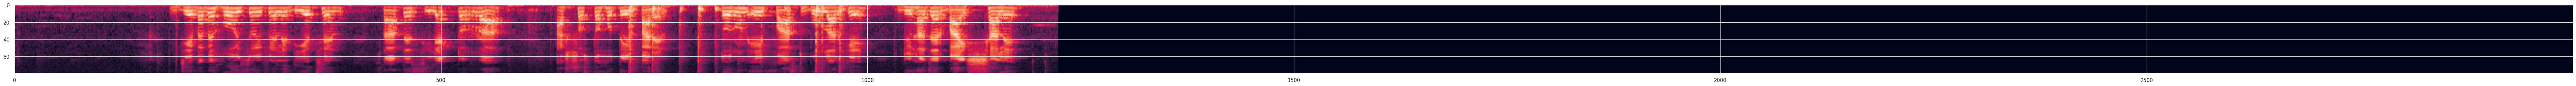

In [ ]:
from matplotlib import pyplot as plt

np_feature = input_features[0].detach().cpu().numpy()

plt.figure(figsize=(100,100))
plt.imshow(np_feature)
plt.show()

In [ ]:
import IPython.display as ipd
import numpy as np
import random
print(sentence1)
ipd.Audio(data=np.asarray(speech_array), autoplay=True, rate=16000)

যেভাবে হইচই ফেলে দিয়েছেন, তাতে selector রা  আশ্বস্ত হতেই পারেন। তরুণ এই fast bowler কে ২০২২ সালে 


In [ ]:
# batch = processor.feature_extractor.pad(input_features, return_tensors="pt")
predicted_ids = model.generate(inputs=input_features)[0]

/usr/local/lib/python3.10/dist-packages/transformers/models/whisper/generation_whisper.py:474: FutureWarning: The input name `inputs` is deprecated. Please make sure to use `input_features` instead.
  warnings.warn(


In [ ]:
transcription = processor.decode(predicted_ids, skip_special_tokens=True)

In [ ]:
transcription

'যেভাবে হইচই ফেলে দিয়েছেন তাতে selector রা আশ্বস্থ হতেই পারেন তরুণ এই fast bowler কে দুই হাজার বাইশ সালে'

WER for individual text

In [ ]:
from evaluate import load

wer_metric = load("wer")

wer = wer_metric.compute(references=[sentence1], predictions=[transcription])

print(wer)

0.19791666666666666


CER for indicidual text

In [ ]:
from evaluate import load
CER_metric = load("cer")
cer = CER_metric.compute(references=[sentence1], predictions=[transcription])
print(cer)

0.19791666666666666


Wer for all test dataset

In [ ]:
import os
import numpy as np
import pandas as pd
import torchaudio
import torchaudio.transforms as T
from transformers import WhisperProcessor, WhisperForConditionalGeneration
import jiwer
import torch

# Define the model and processor
MODEL_NAME = "fayez94/whisper-medium_codeMixed_ASR"
processor = WhisperProcessor.from_pretrained(MODEL_NAME)
model = WhisperForConditionalGeneration.from_pretrained(MODEL_NAME)

# Check if GPU is available and set the device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Define paths to the audio files and CSV file containing transcriptions
test_audio_dir = "/content/drive/MyDrive/Thesis_ASR_DATASET/Thesis_voice_wav_test"
transcriptions_csv_file = "/content/test_csv"

# Load transcriptions from the CSV file
transcriptions_df = pd.read_csv(transcriptions_csv_file)
audio_filenames = [os.path.splitext(f)[0] for f in os.listdir(test_audio_dir) if f.endswith('.wav')]
transcriptions_df = transcriptions_df.set_index('id').loc[audio_filenames]
ground_truth_transcriptions = transcriptions_df['Text'].tolist()

# Function to prepare dataset
def prepare_dataset(path):
    waveform, sample_rate = torchaudio.load(path)
    resample_rate = 16000
    resampler = T.Resample(sample_rate, resample_rate, dtype=waveform.dtype)
    resampled_waveform = resampler(waveform)
    input_features = processor(resampled_waveform, sampling_rate=resample_rate, return_tensors="pt").input_features
    return resampled_waveform, input_features

# Run inference on the test dataset and collect predictions
predicted_transcriptions = []

for audio_file in os.listdir(test_audio_dir):
    if audio_file.endswith('.wav'):
        audio_path = os.path.join(test_audio_dir, audio_file)
        speech_array, input_features = prepare_dataset(audio_path)
        input_features = input_features.to(device)
        predicted_ids = model.generate(inputs=input_features)[0]
        transcription = processor.decode(predicted_ids, skip_special_tokens=True)
        predicted_transcriptions.append(transcription)

# Calculate WER
wer = jiwer.wer(ground_truth_transcriptions, predicted_transcriptions)
print("Word Error Rate (WER) on test dataset:", wer)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


KeyError: "None of [Index(['Recording (2)', 'Recording (1)', 'Recording (3)', 'Recording (4)',\n       'Recording (5)', 'Recording (6)', 'Recording (7)', 'Recording (8)',\n       'Recording (9)', 'Recording (10)', 'Recording (11)', 'Recording (12)',\n       'Recording (13)', 'Recording (14)', 'Recording (15)', 'Recording (16)',\n       'Recording (17)', 'Recording (18)', 'Recording (19)', 'Recording (20)',\n       'Recording (21)', 'Recording (22)', 'Recording (23)', 'Recording (24)',\n       'Recording (25)', 'Recording (26)', 'Recording (27)', 'Recording (28)',\n       'Recording (29)', 'Recording (30)', 'Recording (31)', 'Recording (32)',\n       'Recording (33)', 'Recording (34)', 'Recording (35)', 'Recording (36)',\n       'Recording (37)', 'Recording (38)', 'Recording (39)', 'Recording (40)',\n       'Recording (41)', 'Recording (42)', 'Recording (43)', 'Recording (44)',\n       'Recording (45)', 'Recording (46)', 'Recording (47)', 'Recording (48)',\n       'Recording (49)', 'Recording (50)', 'Recording (51)', 'Recording (52)',\n       'Recording (53)', 'Recording (54)', 'Recording (55)', 'Recording (56)',\n       'Recording (57)', 'Recording (58)', 'Recording (59)', 'Recording (60)',\n       'Recording (61)', 'Recording (62)', 'Recording (63)', 'Recording (64)',\n       'Recording (65)', 'Recording (66)', 'Recording (67)', 'Recording (68)',\n       'Recording (69)', 'Recording (70)', 'Recording (71)', 'Recording (72)',\n       'Recording (73)', 'Recording (74)', 'Recording (75)', 'Recording (76)',\n       'Recording (77)', 'Recording (78)', 'Recording (79)', 'Recording (80)',\n       'Recording (81)', 'Recording (82)', 'Recording (83)', 'Recording (84)',\n       'Recording (85)', 'Recording (86)', 'Recording (87)', 'Recording (88)',\n       'Recording (89)', 'Recording (90)', 'Recording (91)', 'Recording (92)',\n       'Recording (93)', 'Recording (94)', 'Recording (95)', 'Recording (96)',\n       'Recording (97)', 'Recording (98)', 'Recording (99)',\n       'Recording (100)'],\n      dtype='object', name='id')] are in the [index]"

In [ ]:
inference("/content/drive/MyDrive/Thesis_ASR_DATASET/Thesis_voice_wav_test/Recording (86).wav")

'programmer ইশরাদ্জাহানের হাত ধরে আরাফাৎকরিম ছবি আকার পর programming করে সেগুলো দিয়ে filter তৈরি করেন ইশরাদ্জাহান'

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.6 MB/s e

In [ ]:
from transformers import pipeline
import gradio as gr

#pipe = pipeline("automatic-speech-recognition", model="openai/whisper-small")


gr.Interface(inference,gr.Audio(type="filepath"),"text").launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ff6a19aec9ec146849.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
